## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from datetime import datetime, timedelta

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering

from yellowbrick.cluster import KElbowVisualizer

import warnings

warnings.simplefilter('ignore')
pd.options.display.max_columns = None
pd.set_option('display.float_format', lambda x: '%.5f' % x)
sns.set_palette("mako")

In [2]:
df = pd.read_csv("../data/marketing_campaign.csv", delimiter="\t")
df.shape

(2240, 29)

In [3]:
df.head()

ID  Year_Birth   Education Marital_Status      Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single 58138.00000        0         0   
1  2174        1954  Graduation         Single 46344.00000        1         1   
2  4141        1965  Graduation       Together 71613.00000        0         0   
3  6182        1984  Graduation       Together 26646.00000        1         0   
4  5324        1981         PhD        Married 58293.00000        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

## Columns Description

### **People**
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

### **Products**

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

### **Promotion**

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### **Place**

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Changing the Dt_Customer column to datetime type

In [5]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")

Is the ID column unique?

In [6]:
df['ID'].duplicated().any()

False

Is there any nulls?

In [7]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

## Handling the missing data in the Income column

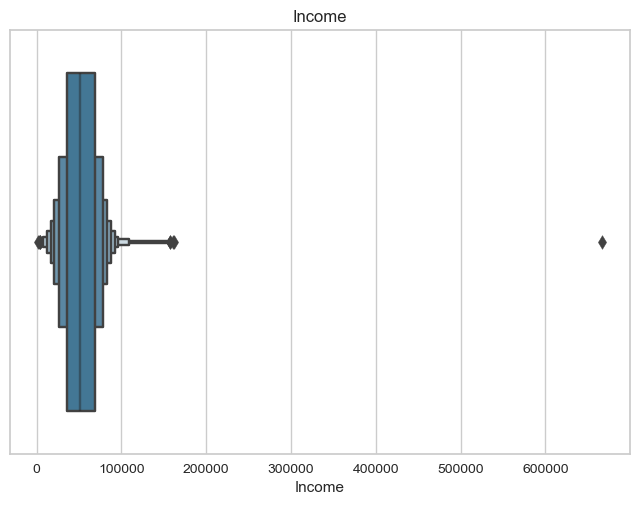

In [8]:
sns.boxenplot(df, x='Income', palette='mako')
plt.title('Income')
plt.show()

Quickly handling the categorical data for the multiple iterative imputer

In [9]:
df_clean = df.copy()
df_dummies = pd.get_dummies(df_clean[['Education','Marital_Status']], dtype='float')
df_clean = pd.concat([df_clean,df_dummies],axis=1)
df_clean.drop(['Education','Marital_Status'],axis=1, inplace=True)
df_clean['day_customer'] = df['Dt_Customer'].dt.day
df_clean['month_customer'] = df['Dt_Customer'].dt.month
df_clean['year_customer'] = df['Dt_Customer'].dt.year
df_clean.drop('Dt_Customer',axis=1,inplace=True)

### Multiple Iterative Imputer

In [10]:
imputer = IterativeImputer(max_iter=10, random_state=42)
df_filled = imputer.fit_transform(df_clean)
df_filled = pd.DataFrame(df_filled, columns=df_clean.columns)

In [11]:
df_filled['Income'].mean()

52231.17381683443

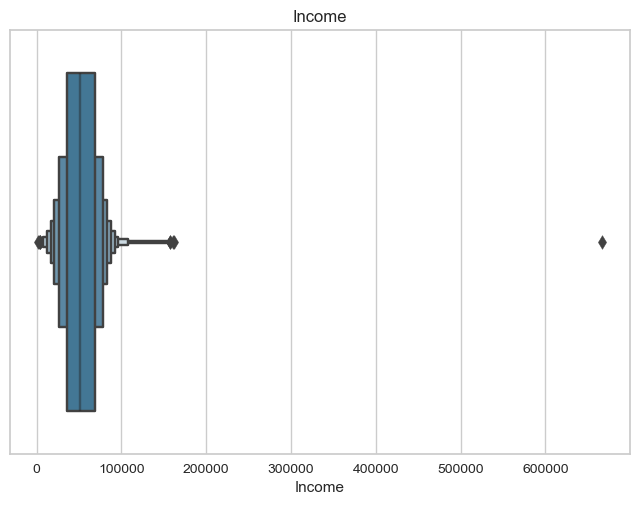

In [12]:
sns.boxenplot(df_filled, x='Income', palette='mako')
plt.title('Income')
plt.show()

In [13]:
df['Income'] = df_filled['Income']

## 1. Demographic Analysis
What is the distribution of customers based on education level, marital status, and income?

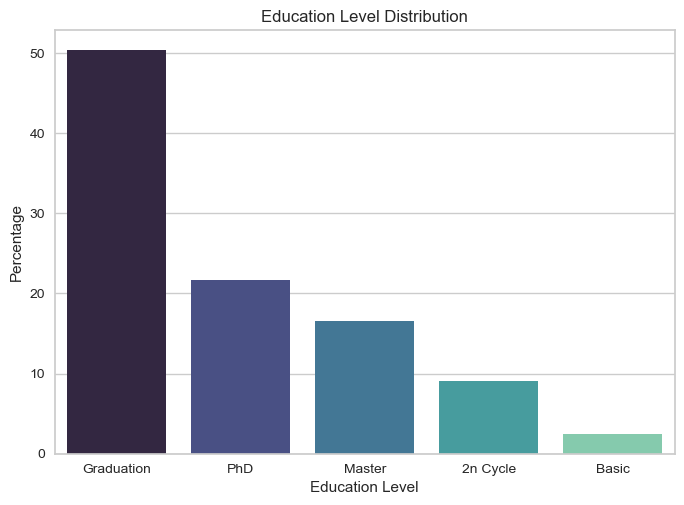

In [14]:
education = df['Education'].value_counts()
sns.barplot(x=education.index, y=education.values/len(df) * 100, palette='mako')
plt.xlabel("Education Level")
plt.ylabel("Percentage")
plt.title("Education Level Distribution")
plt.show()

59 % of customers have intermediate education, 38% have higher education, and only 2% have lower education.

The fact that a significant majority of customers have intermediate and higher education suggests that the customer base is well-educated, while a small proportions of customer have lower education.

This may imply that the products or services cater more to a demographic with higher educational attainment, potentially impacting marketing strategies, product offerings, and communication approaches.

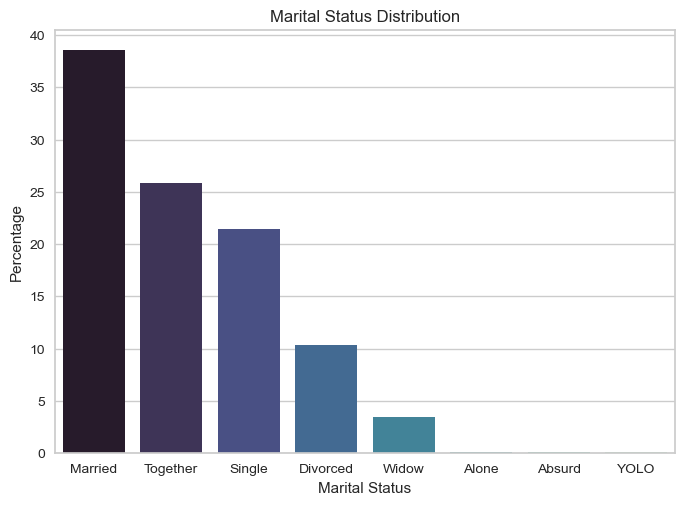

In [15]:
martial_status = df['Marital_Status'].value_counts()
sns.barplot(x=martial_status.index, y=martial_status.values/len(df) * 100, palette='mako')
plt.xlabel("Marital Status")
plt.ylabel("Percentage")
plt.title("Marital Status Distribution")
plt.show()

Approximately 64% of customers have partners or wives, showing a strong presence of family units in the consumer base. These clients may be more interested in home-related products and services, such as domestic equipment, family-friendly entertainment alternatives, and convenience items.

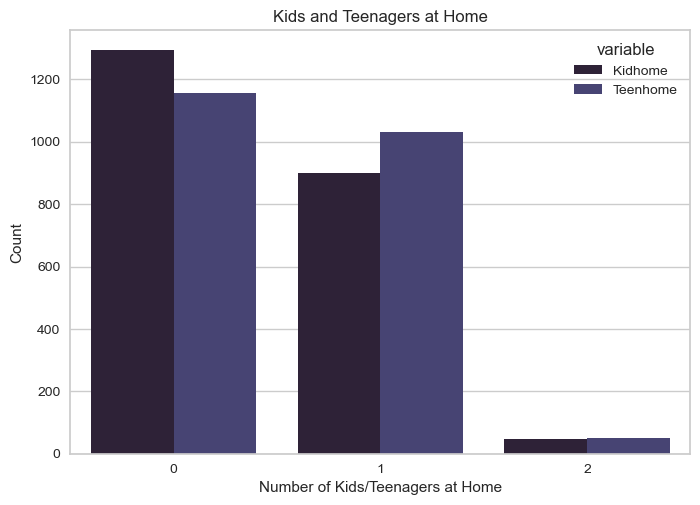

In [16]:
kidhome = df['Kidhome'].value_counts()
teenhome = df['Teenhome'].value_counts()
data = pd.DataFrame({'Kidhome': kidhome, 'Teenhome': teenhome})
data_melted = data.reset_index().melt(id_vars='index', value_vars=['Kidhome', 'Teenhome'])
sns.barplot(data=data_melted, x='index', y='value', hue='variable')
plt.title('Kids and Teenagers at Home')
plt.xlabel('Number of Kids/Teenagers at Home')
plt.ylabel('Count')
plt.show()

The nearly equal proportions of customers with and without kids or teenagers in their families suggest that our market encompasses diverse demographics with varying lifestyle preferences and purchasing behaviors.

While customers without kids or teenagers may gravitate towards personal experiences, luxury items, or products for personal use, those with younger family members are likely inclined towards family-oriented purchases. However, the balanced distribution implies that our focus should not be exclusive to either category. Instead, it underscores the importance of offering a comprehensive range of products and experiences that cater to the diverse needs and preferences of both segments of our customer base.

## 2. Customer Purchase Behavior
How much do customers spend on different product categories?

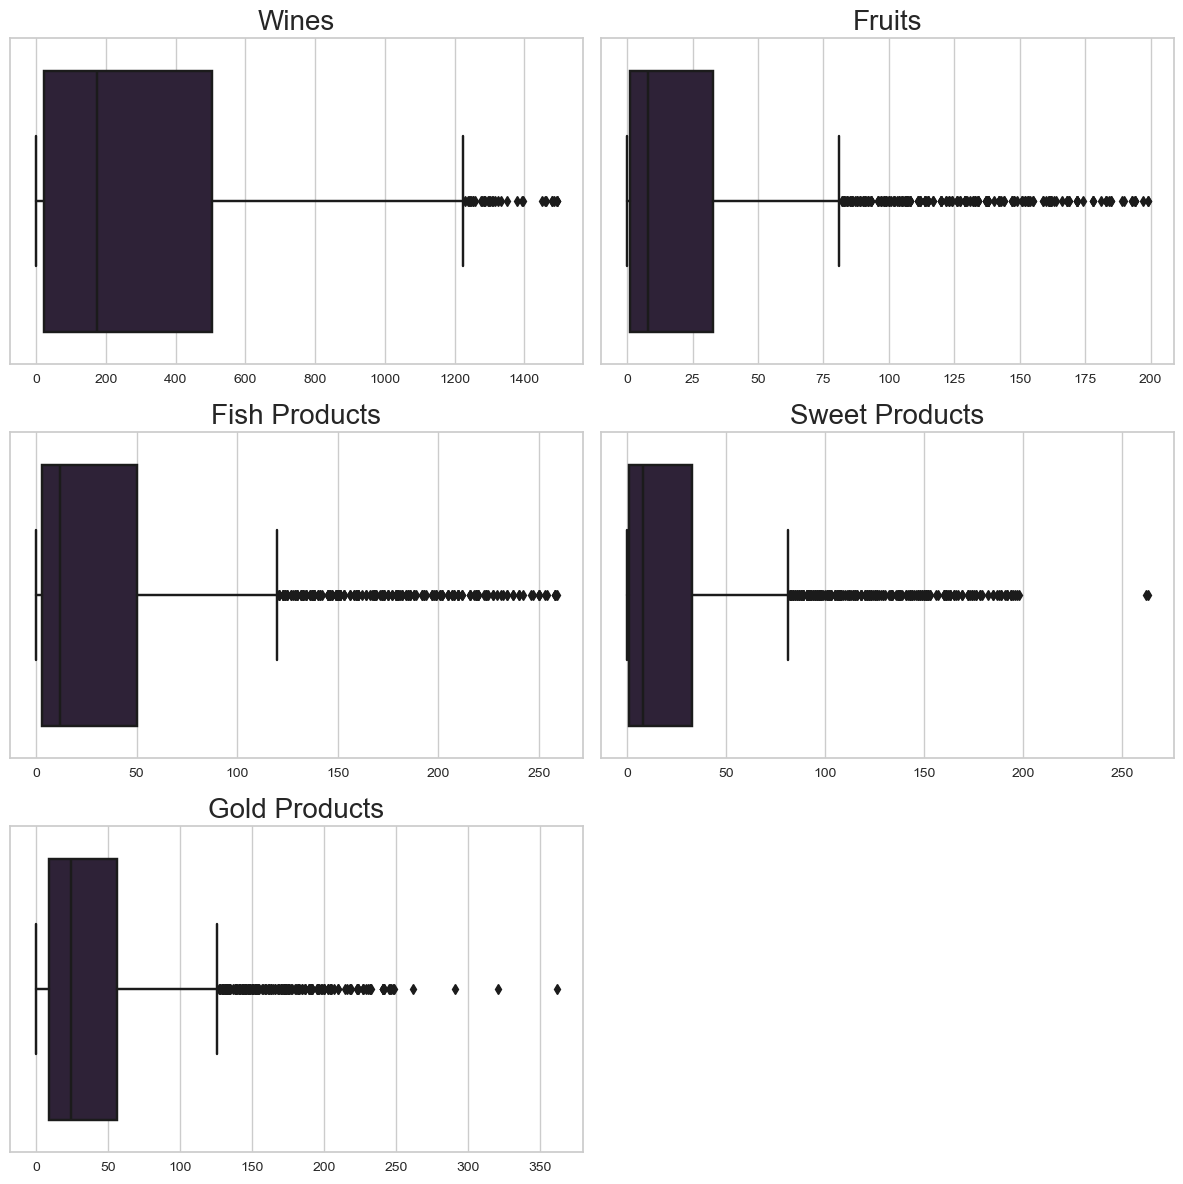

In [17]:
fig, ax = plt.subplots(3,2, figsize=(12,12))

ax[0,0] = sns.boxplot(df, x='MntWines', ax=ax[0,0])
ax[0,0].set_title("Wines", fontsize=20)
ax[0,0].set_xlabel("")

ax[0,1] = sns.boxplot(df, x='MntFruits', ax=ax[0,1])
ax[0,1].set_title("Fruits", fontsize=20)
ax[0,1].set_xlabel("")

ax[1,0] = sns.boxplot(df, x='MntFishProducts', ax=ax[1,0])
ax[1,0].set_title("Fish Products", fontsize=20)
ax[1,0].set_xlabel("")

ax[1,1] = sns.boxplot(df, x='MntSweetProducts', ax=ax[1,1])
ax[1,1].set_title("Sweet Products", fontsize=20)
ax[1,1].set_xlabel("")

ax[2,0] = sns.boxplot(df, x='MntGoldProds', ax=ax[2,0])
ax[2,0].set_title("Gold Products", fontsize=20)
ax[2,0].set_xlabel("")

ax[2, 1].axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.tight_layout()
plt.show()

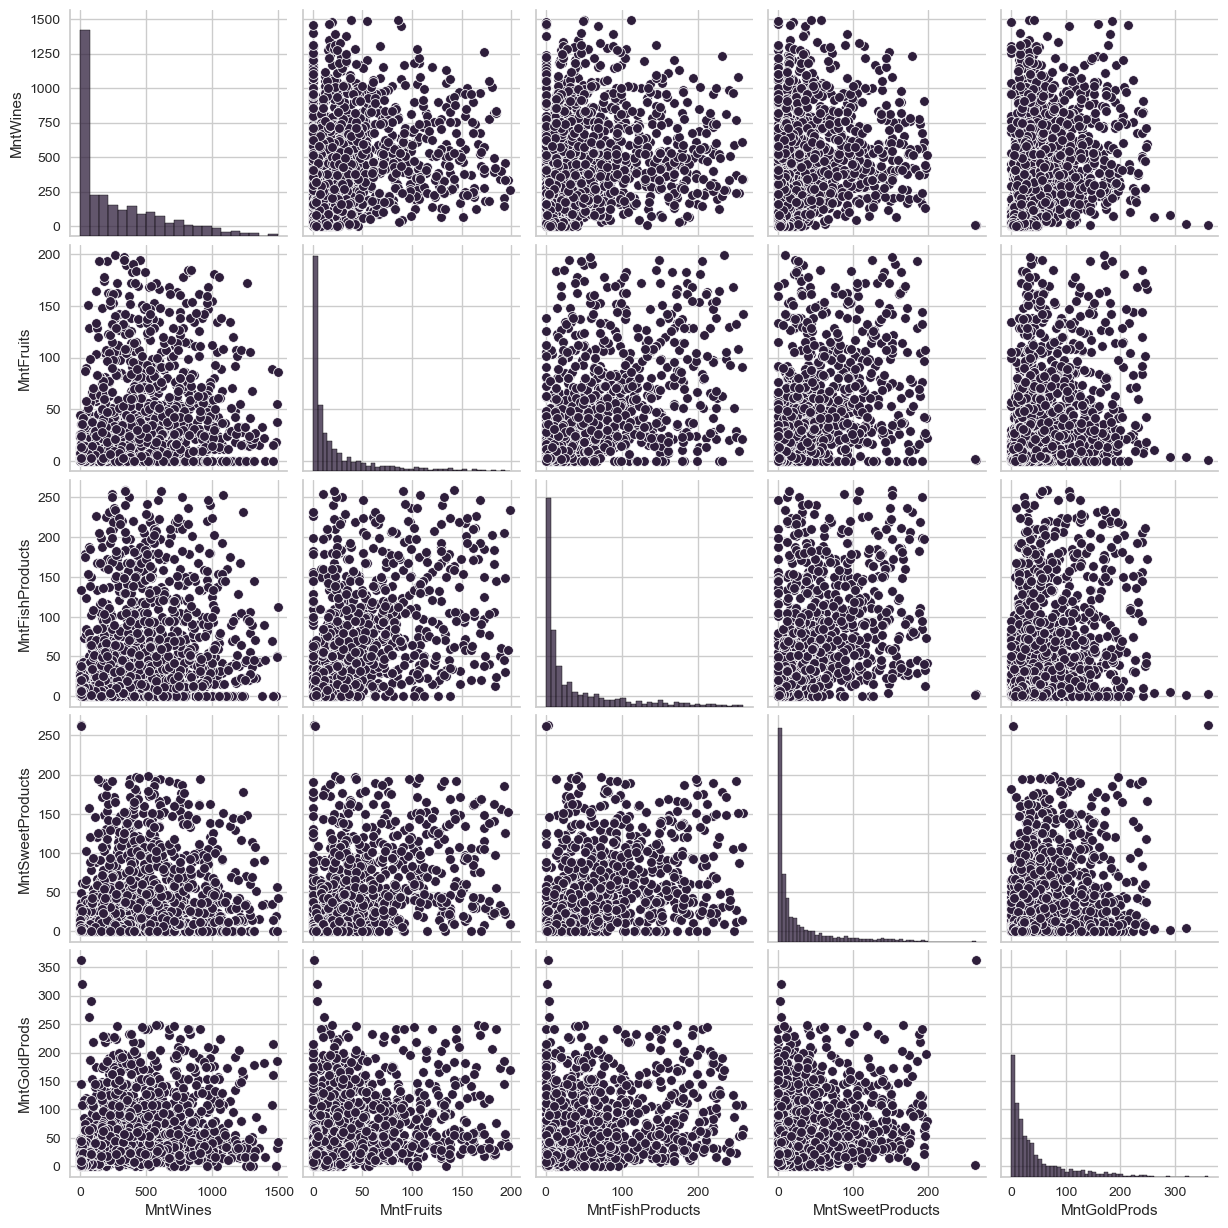

In [18]:
sns.pairplot(df[['MntWines', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']])
plt.show()

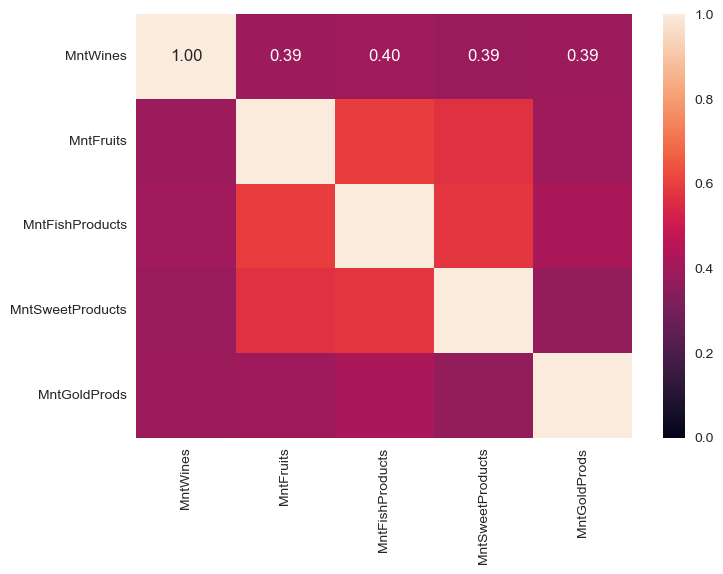

In [19]:
correlation_matrix = df[['MntWines', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].corr()
sns.heatmap(correlation_matrix, fmt=".2f", vmin=0, vmax=1, annot=True)
plt.show()

Cheaper and more neccessary products such as Fruits, Fish, and Sweet products are more correlated together than more expensice and less neccessary products like Wines and Gold.

This suggests that these items may be purchased together more frequently. This insight could guide product placement strategies, such as grouping these items together in promotions or displays to encourage cross-selling and increase sales volume.

## 3. Customer Complaint Analysis
What proportion of customers have complained in the last 2 years?

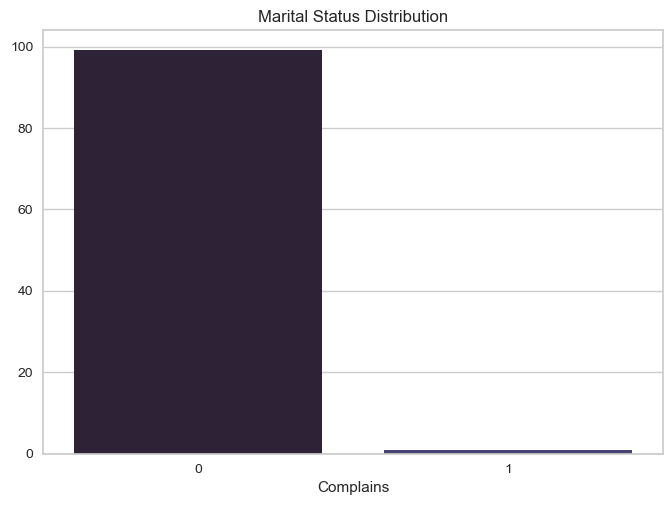

In [20]:
complain = df['Complain'].value_counts()
sns.barplot(x=complain.index, y=complain.values/len(df) * 100)
plt.title("Marital Status Distribution")
plt.xlabel("Complains")
plt.show()

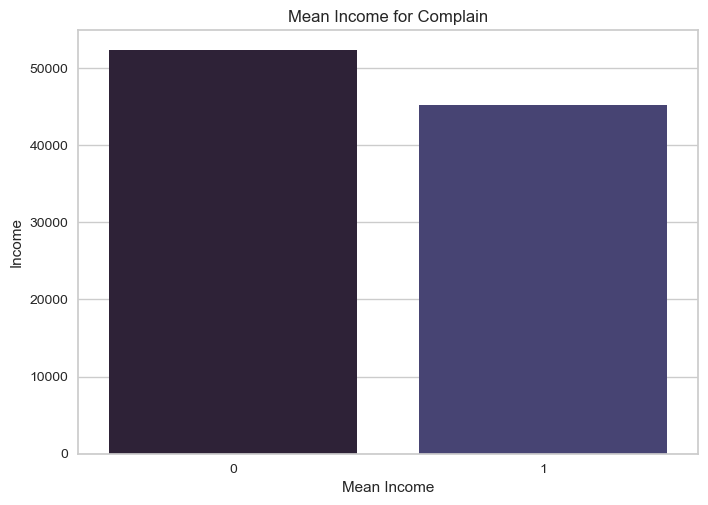

In [21]:
complain_income = df[['Income','Complain']].groupby('Complain').mean().reset_index(drop='True')
sns.barplot(x=complain_income.index, y=complain_income['Income'])
plt.title("Mean Income for Complain")
plt.xlabel("Mean Income")
plt.show()

Although less tha 1% of the customers complained in the past two years, but these customers have lower income than the other customer. This could be due to various factors such as affordability constraints, higher expectations for value, or a greater reliance on customer service.

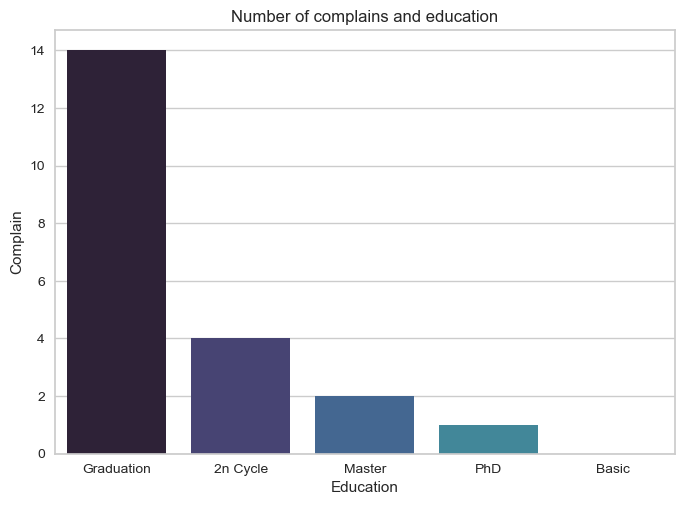

In [22]:
complain_education = df[['Education','Complain']].groupby('Education').sum().reset_index().sort_values(by='Complain',ascending=False)
sns.barplot(x=complain_education.Education, y=complain_education['Complain'])
plt.title("Number of complains and education")
plt.xlabel("Education")
plt.show()

This chart illustrates the distribution of complaints across different education levels. It's noteworthy that graduated customers accounted for the highest number of complaints, followed by those with 2nd cycle, master, and PhD education levels. Interestingly, no complaints were recorded from customers with basic education. However, it's essential to recognize that the number of graduated customers is significantly higher than those with basic education, which may influence the observed disparity in complaint numbers.

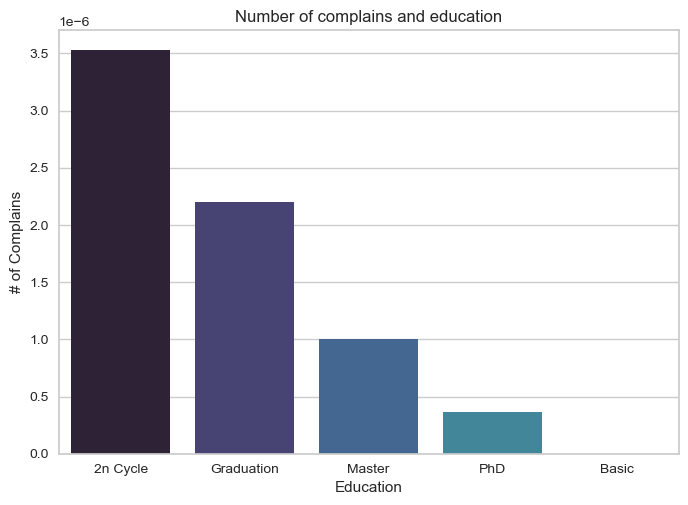

In [23]:
complain_education = df[['Education','Complain']].groupby('Education').sum().reset_index()
complain_education['count'] = df[['Education','ID']].groupby('Education').sum().reset_index()['ID']
complain_education['pct'] = complain_education['Complain'] / complain_education['count']
complain_education = complain_education.sort_values(by='pct', ascending=False)

sns.barplot(x=complain_education.Education, y=complain_education['pct'])
plt.title('Number of complains and education')
plt.xlabel("Education")
plt.ylabel("# of Complains")
plt.show()

After analyzing the proportions of complaints among customers with varying levels of education we notice that customers with higher education has more complains the customers with basic education, who have none. This could mean that customers with higher levels of education may have higher expectations for product quality, service delivery, and overall customer experience. As a result, they may be more likely to notice and voice concerns or complaints when their expectations are not met.

## 4. Purchase Control Preference
How do customers prefer to make purchases (web, catalog, store)

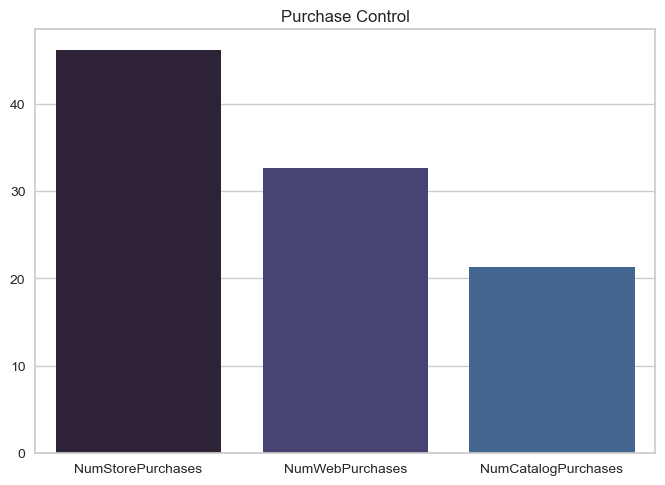

In [24]:
purchases_preference = df[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum() / df[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum().sum() * 100
purchases_preference = purchases_preference.sort_values(ascending=False)

sns.barplot(x=purchases_preference.index,y=purchases_preference.values)
plt.title("Purchase Control")
plt.show()

Most sales occur in-store, indicating a preference for convenience and immediacy. The widespread availability of multiple stores across locations likely contributes to customer accessibility. While online purchases make up a significant portion of sales, their lower percentage raises concerns about the online purchase process and marketing effectiveness. Catalog purchases, though representing only 21% of sales, continue to attract and retain customers.

**Recommendations for Improvement:**
1. Enhance website usability and checkout process.
2. Intensify digital marketing efforts to drive online traffic.
3. Personalize online experiences with tailored recommendations.
4. Provide responsive customer support for online inquiries.
5. Continuously monitor feedback and iterate on improvements for a seamless online shopping experience.

## 5. Recency Analysis

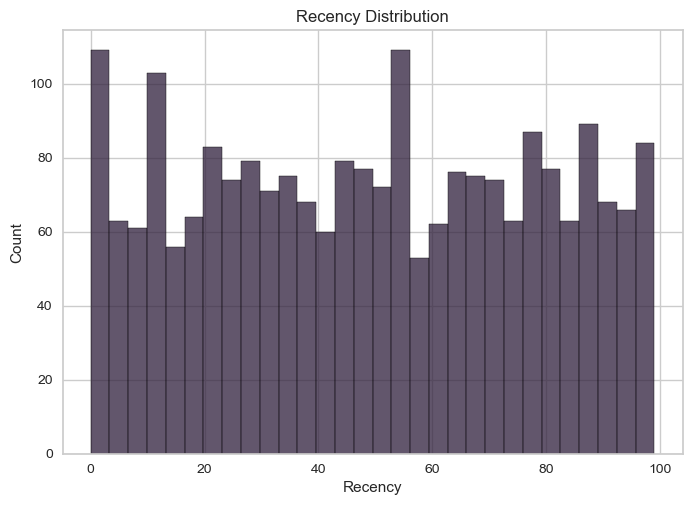

In [25]:
sns.histplot(df, x='Recency', bins=30)
plt.title("Recency Distribution")
plt.show()

A uniform histogram distribution in the "Recency" column is a positive sign, indicating stable and consistent purchasing behavior among customers. However, It's important to check other variables as well and see if we'll capture any patterns

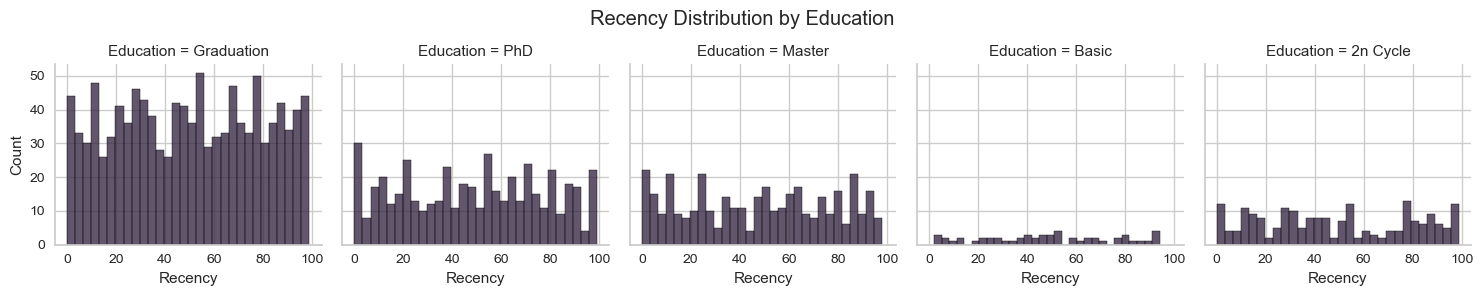

In [26]:
g = sns.FacetGrid(df, col='Education')
g.map(sns.histplot, 'Recency', bins=30)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Recency Distribution by Education")
plt.show()

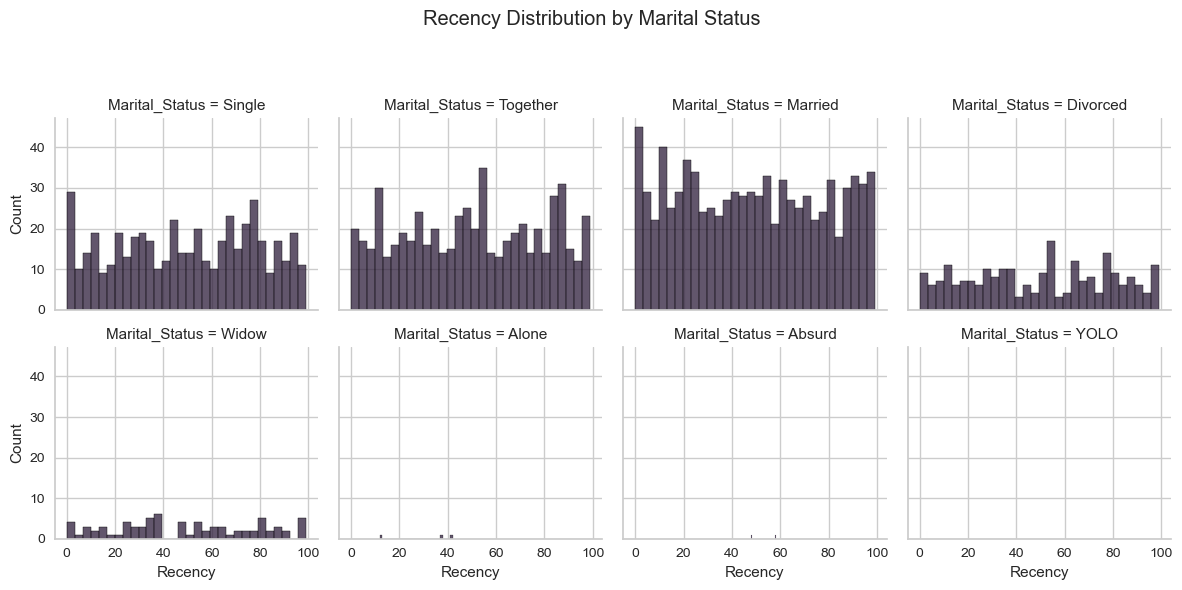

In [27]:
g = sns.FacetGrid(df, col='Marital_Status', col_wrap=4)
g.map(sns.histplot, 'Recency', bins=30)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Recency Distribution by Marital Status")
plt.show()

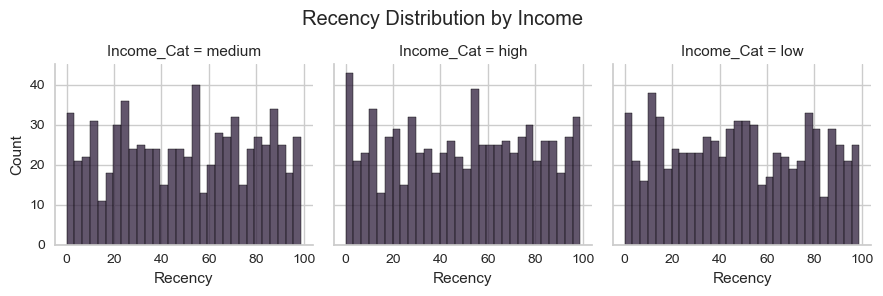

In [28]:
df['Income_Cat'] = df['Income'].apply(lambda x: 'low' if x < df['Income'].quantile(0.33) else 'medium' if x < df['Income'].quantile(0.66) else 'high')

g = sns.FacetGrid(df, col='Income_Cat')
g.map(sns.histplot, 'Recency', bins=30)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Recency Distribution by Income")
plt.show()

Upon analyzing recency distributions across various demographic variables like education, marital status, and income category, no discernible patterns emerged. The consistent, uniform distributions indicate that purchasing behavior does not exhibit significant variations based on these demographic factors. This suggests that factors beyond demographics likely play a more influential role in shaping customer purchasing habits. Further exploration into other variables and deeper analysis may reveal additional insights to inform targeted strategies and better address customer needs.

# Customer Segmentation

Based on the provided dataset, here are some potential new features you could create:

1. **Age:** Calculate the age of each customer by subtracting their birth year (Year_Birth) from the current year.

2. **Total Amount Spent:** Sum up the amounts spent on different product categories (e.g., MntWines, MntFruits, MntMeatProducts, etc.) to create a new feature representing the total amount spent by each customer.

3. **Total Number of Purchases:** Sum up the number of purchases made across different channels (e.g., NumWebPurchases, NumCatalogPurchases, NumStorePurchases) to create a new feature representing the total number of purchases made by each customer.

4. **Campaign Engagement:** Create a new feature indicating the total number of campaigns each customer has engaged with by summing up the values of AcceptedCmp1 to AcceptedCmp5.

5. **Customer Lifetime:** Calculate the duration between the enrollment date (Dt_Customer) and the most recent purchase date (Recency) to create a new feature representing the customer's lifetime with the company.

6. **Family Size:** Combine the number of children (Kidhome) and teenagers (Teenhome) in the household to create a new feature representing the total family size.

7. **Income Level:** Categorize the income (Income) into different income brackets (e.g., low, medium, high) based on predefined thresholds.

8. **Customer Activity:** Create a new feature representing the overall customer activity by summing up the values of NumWebVisitsMonth and Recency (normalized if needed).

9. **Complaint Frequency:** Calculate the frequency of complaints by summing up the values of Complain over a specific time period (e.g., per year).

10. **Response Rate:** Calculate the response rate by dividing the number of customers who responded to the last campaign (Response) by the total number of customers.

These new features can provide valuable insights into customer behavior, preferences, and engagement with the company, which can be useful for segmentation, targeting, and personalized marketing strategies.

## Age

In order to calculate each customer's age, I have to get the difference between the day this dataset was recorded and their birth date. but since I have no clue of what year this dataset was recorded, I thought of summing Dt_Customer and Recency for each customer and identifying the maximum value. This approach assumes that the most recent recorded purchase corresponds to the dataset's latest entry.

In [29]:
max_date = (df['Dt_Customer'] + pd.to_timedelta(df['Recency'], unit='D')).max()
max_date

Timestamp('2014-10-04 00:00:00')

In [30]:
df['Age'] = max_date.year - df['Year_Birth']

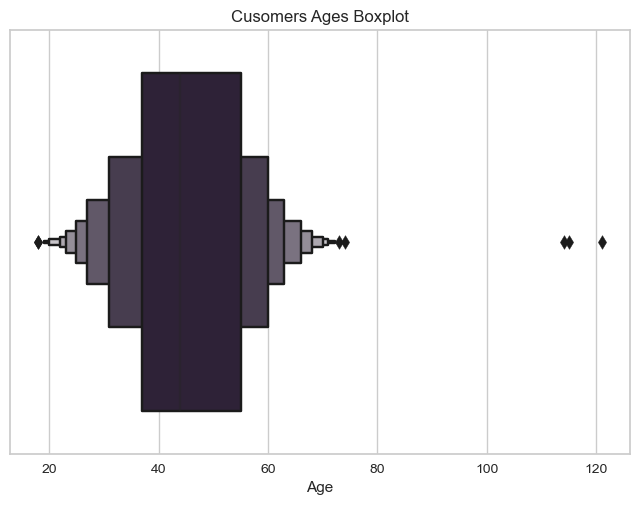

In [31]:
sns.boxenplot(df, x='Age')
plt.title("Cusomers Ages Boxplot")
plt.show()

In [32]:
df[df['Age'] > 100]

ID  Year_Birth Education Marital_Status      Income  Kidhome  \
192   7829        1900  2n Cycle       Divorced 36640.00000        1   
239  11004        1893  2n Cycle         Single 60182.00000        0   
339   1150        1899       PhD       Together 83532.00000        0   

     Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
192         0  2013-09-26       99        15          6                8   
239         1  2014-05-17       23         8          0                5   
339         0  2013-09-26       36       755        144              562   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
192                7                 4            25                  1   
239                7                 0             2                  1   
339              104                64           224                  1   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
192                2                    1                  2   
239                1                    0                  2   
339                4                    6                  4   

     NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
192                  5             0             0             0   
239                  4             0             0             0   
339                  1             0             0             1   

     AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
192             0             0         1              3         11         0   
239             0             0         0              3         11         0   
339             0             0         0              3         11         0   

    Income_Cat  Age  
192        low  114  
239     medium  121  
339       high  115

It's highly likely that these ages are errors or outliers. While it's not impossible for someone to live to be 114 or 115 years old, it's extremely rare, and having multiple customers with such advanced ages is suspicious. A person reported to be 121 years old would be considered the oldest person ever recorded, which is highly improbable.

In [33]:
df = df[df['Age'] < 100]
df.drop('Year_Birth',axis=1, inplace=True)

## Total Amount Spent

Here I will add up all the amount spent on wines, fruits, fish, sweet, and gold products to get the total amount spent on products.

In [34]:
df['Total_Spent'] = df[['MntWines','MntFruits','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

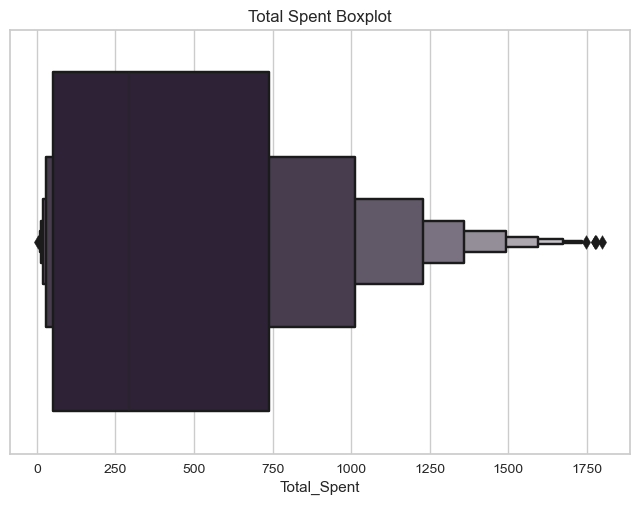

In [35]:
sns.boxenplot(df, x='Total_Spent')
plt.title("Total Spent Boxplot")
plt.show()

## Number of Purchases

Here, I will add up all of the purchases made through the internet, catalogs, and physical stores to get the overall amount of purchases.

In [36]:
df['TotalNumPurchases'] = df[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(axis=1)

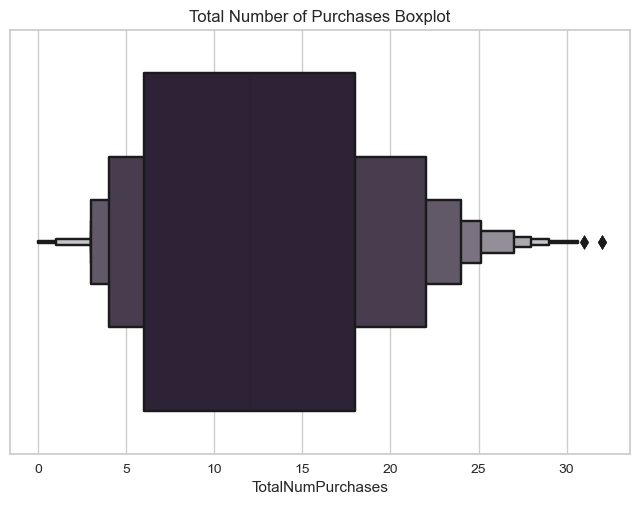

In [37]:
sns.boxenplot(df, x='TotalNumPurchases')
plt.title("Total Number of Purchases Boxplot")
plt.show()

In [38]:
df[df['TotalNumPurchases'] == 0]

ID   Education Marital_Status       Income  Kidhome  Teenhome  \
655    5555  Graduation       Divorced 153924.00000        0         0   
981    3955  Graduation       Divorced   4861.00000        0         0   
1245   6862  Graduation       Divorced   1730.00000        0         0   
1524  11110  Graduation         Single   3502.00000        1         0   
1846   9931         PhD        Married   4023.00000        1         1   
2132  11181         PhD        Married 156924.00000        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
655   2014-02-07       81         1          1                1   
981   2014-06-22       20         2          1                1   
1245  2014-05-18       65         1          1                3   
1524  2013-04-13       56         2          1                1   
1846  2014-06-23       29         5          0                1   
2132  2013-08-29       85         2          1                2   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
655                 1                 1             1                  0   
981                 1                 0             1                  0   
1245                1                 1             1                 15   
1524                0                 0             1                  0   
1846                1                 1             1                 15   
2132                1                 1             1                  0   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
655                 0                    0                  0   
981                 0                    0                  0   
1245                0                    0                  0   
1524                0                    0                  0   
1846                0                    0                  0   
2132                0                    0                  0   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
655                   0             0             0             0   
981                  14             0             0             0   
1245                 20             0             0             0   
1524                 14             0             0             0   
1846                 19             0             0             0   
2132                  0             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
655              0             0         0              3         11   
981              0             0         0              3         11   
1245             0             0         0              3         11   
1524             0             0         0              3         11   
1846             0             0         0              3         11   
2132             0             0         0              3         11   

      Response Income_Cat  Age  Total_Spent  TotalNumPurchases  
655          0       high   39            5                  0  
981          0        low   49            5                  0  
1245         0        low   43            5                  0  
1524         0        low   41            4                  0  
1846         0        low   51            8                  0  
2132         0       high   65            6                  0

Some customers have recorded non-zero expenditures in the 'Total_Spent' column despite having made no purchases through the three primary channels (catalog, store, website). This discrepancy suggests the existence of alternative purchasing avenues beyond these channels. Therefore, relying solely on data from these three channels may not fully capture the breadth of customer purchasing behavior.

## Campaign Engagement

Here, I will add up all of the Accepted camps to get the total number of accepted camps

In [39]:
df['TotalAcceptedCmp'] = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].sum(axis=1)

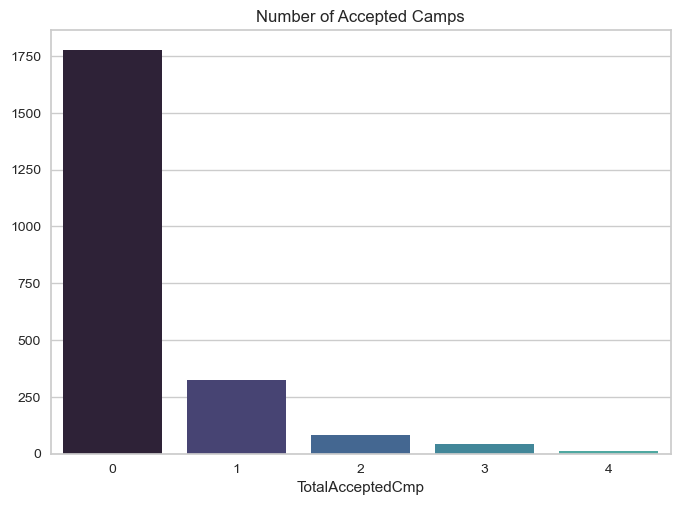

In [40]:
totalAcceptedCmp = df['TotalAcceptedCmp'].value_counts()

sns.barplot(x=totalAcceptedCmp.index, y=totalAcceptedCmp.values)
plt.title("Number of Accepted Camps")
plt.show()

## Customer Lifetime

To estimate the recency date. I will subtract the recency value from the estimated current date.

In [41]:
df['Recency_Date'] = max_date - pd.to_timedelta(df['Recency'], unit='D')

df['Customer_Lifetime'] = df['Recency_Date'] - df['Dt_Customer']
df['Customer_Lifetime'] = df['Customer_Lifetime'].astype(str).str.split(" ")
df['Customer_Lifetime'] = df['Customer_Lifetime'].apply(lambda x: x[0])
df['Customer_Lifetime'] = df['Customer_Lifetime'].astype(int)

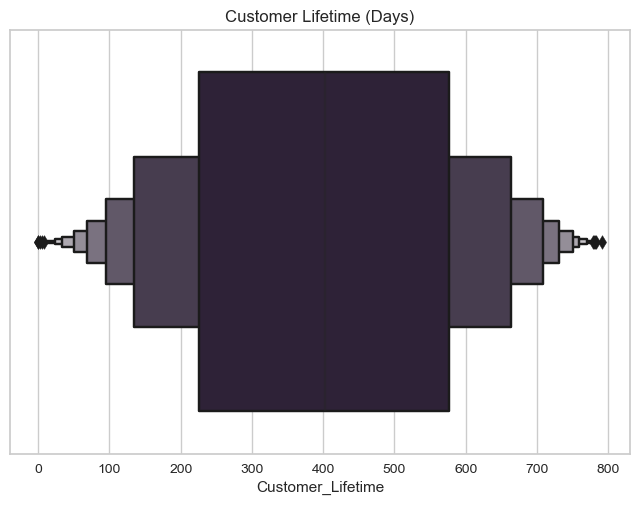

In [42]:
sns.boxenplot(df, x='Customer_Lifetime')
plt.title('Customer Lifetime (Days)')
plt.show()

## Family Size

To estimate Family size, I will add up Teenhome and kidhome plus 1 in case the user has a partner.

In [43]:
df['Famsize'] = df.apply(lambda x: x.Teenhome + x.Kidhome + 1 if x.Marital_Status in ['Married','Together'] else x.Teenhome + x.Kidhome, axis=1)

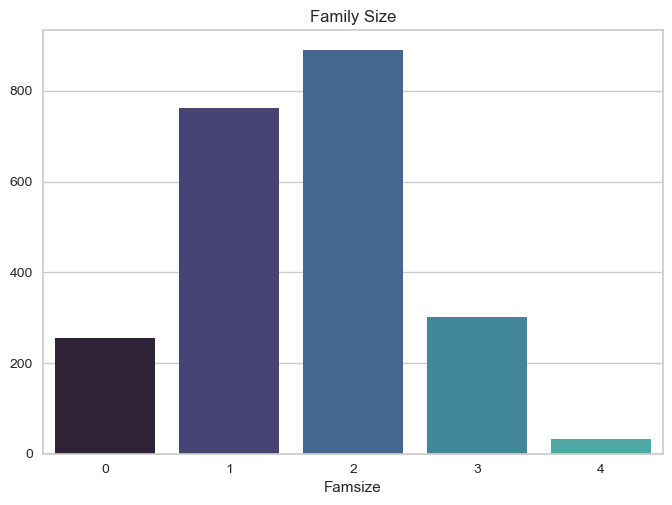

In [44]:
famsize = df['Famsize'].astype('O').value_counts()
sns.barplot(x=famsize.index, y=famsize.values)
plt.title("Family Size")
plt.show()

I will create a new column named 'have_family' to categorize customers based on their family status. This boolean column would have a value of 0 if the 'Famsize' indicates no family (0), and a value of 1 if the 'Famsize' indicates a family size of 1 or more.

In [45]:
df['have_family'] = (df['Famsize'] > 0).astype(int)

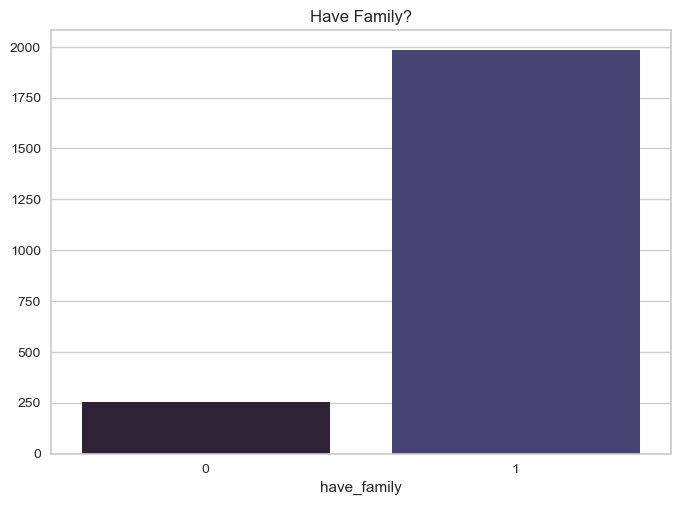

In [46]:
family_status = df['have_family'].value_counts()

sns.barplot(x=family_status.index, y=family_status.values)
plt.title("Have Family?")
plt.show()

Here I will take a copy of the dataframe for the profiling phase

In [47]:
df_ = df.copy()

## Marital Status

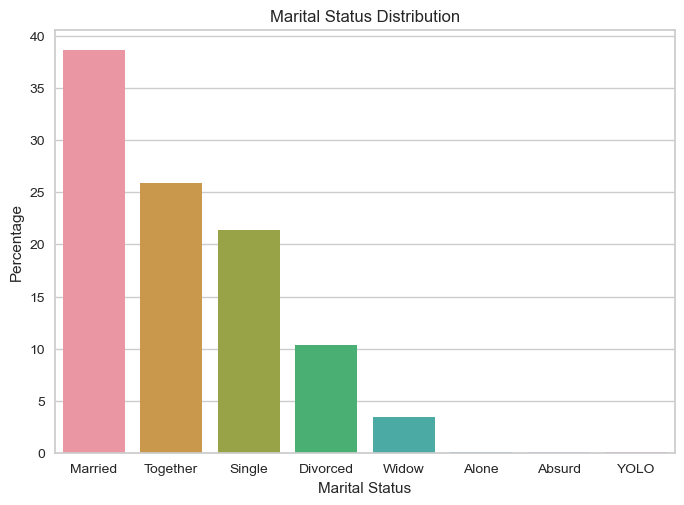

In [48]:
martial_status = df['Marital_Status'].value_counts()
sns.barplot(x=martial_status.index, y=martial_status.values/len(df) * 100)
plt.xlabel("Marital Status")
plt.ylabel("Percentage")
plt.title("Marital Status Distribution")
plt.show()

Considering the distribution of values in the marital_status column, it seems that 'Single,' 'Alone,' 'Absurd,' and 'YOLO' categories share similar meanings, with lower frequencies compared to 'Married' and 'Together' statuses. I propose combining these categories into a single group. This consolidation not only reduces complexity but also ensures a more cohesive representation of marital status variations and a better interpretability.

In [49]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if x in ['Alone','Absurd','YOLO'] else x)
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'HavePartner' if x in ['Married','Together'] else x)
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Widow/Divorced' if x in ['Widow','Divorced'] else x)

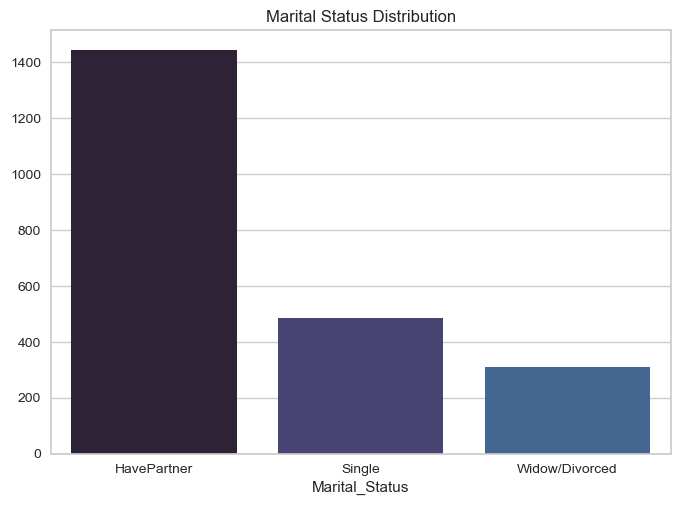

In [50]:
marital_status = df['Marital_Status'].value_counts()

sns.barplot(x=marital_status.index, y=marital_status.values)
plt.title("Marital Status Distribution")
plt.show()

## Education

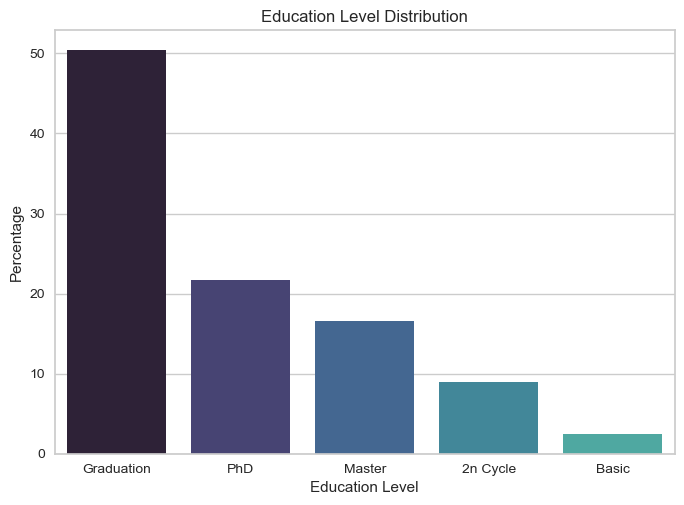

In [51]:
education = df['Education'].value_counts()
sns.barplot(x=education.index, y=education.values/len(df) * 100)
plt.xlabel("Education Level")
plt.ylabel("Percentage")
plt.title("Education Level Distribution")
plt.show()

Here in the Education column, I will categorize these value into High Education, Medium Education and Low Education

In [52]:
df['Education'] = df['Education'].apply(lambda x: 'HighEducation' if x in ['PhD','Master'] else x)
df['Education'] = df['Education'].apply(lambda x: 'MediumEducation' if x in ['Graduation','2n Cycle'] else x)
df['Education'] = df['Education'].apply(lambda x: 'LowEducation' if x in ['Basic'] else x)

Now lets move on to data preprocessing

# Data Preprocessing

Here I will drop the Dt_Customer and Recency_Date since we have other columns that hold the same information.|

In [53]:
df.drop(['Dt_Customer','Recency_Date'],axis=1, inplace=True)

## One Hot Encoding categorical Data

I will use one hot encoding to encode the nominal columns (Marital Status) and label encoder to ecnode ordianl colunmns (Education, Income Cat).

In [54]:
# One hot encoding
df = pd.concat([df,pd.get_dummies(df['Marital_Status'],dtype=float)],axis=1)

# Label encoding
df['Income_Cat'] = df['Income_Cat'].map({'low':1, 'medium':2, 'high':3})
df['Education'] = df['Education'].map({'LowEducation':1, 'MediumEducation':2, 'HighEducation':3})

df.drop('Marital_Status',axis=1, inplace=True)

## Feature Scaling

In [55]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [56]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.describe()

ID  Education     Income    Kidhome   Teenhome    Recency  \
count 2237.00000 2237.00000 2237.00000 2237.00000 2237.00000 2237.00000   
mean     0.00000    0.00000    0.00000    0.00000   -0.00000    0.00000   
std      1.00022    1.00022    1.00022    1.00022    1.00022    1.00022   
min     -1.72320   -2.57510   -2.01148   -0.82539   -0.93023   -1.69621   
25%     -0.85123   -0.67895   -0.67824   -0.82539   -0.93023   -0.86718   
50%     -0.04183   -0.67895   -0.03608   -0.82539   -0.93023   -0.00361   
75%      0.87421    1.21720    0.64704    1.03215    0.90642    0.85996   
max      1.72614    1.21720   24.47869    2.88969    2.74306    1.72353   

        MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
count 2237.00000 2237.00000       2237.00000       2237.00000   
mean     0.00000   -0.00000         -0.00000          0.00000   
std      1.00022    1.00022          1.00022          1.00022   
min     -0.90341   -0.66161         -0.73984         -0.68689   
25%     -0.83208   -0.63642         -0.66893         -0.63197   
50%     -0.38632   -0.46013         -0.44287         -0.46722   
75%      0.59437    0.16948          0.28848          0.22840   
max      3.53345    4.35009          6.90607          4.05430   

       MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
count        2237.00000    2237.00000         2237.00000       2237.00000   
mean           -0.00000       0.00000            0.00000          0.00000   
std             1.00022       1.00022            1.00022          1.00022   
min            -0.65566      -0.84486           -1.20403         -1.47082   
25%            -0.63144      -0.67192           -0.68656         -0.75109   
50%            -0.46189      -0.38370           -0.16910         -0.03137   
75%             0.14366       0.23118            0.34837          0.68836   
max             5.71473       6.11097            6.55797          8.24547   

       NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
count           2237.00000         2237.00000         2237.00000   
mean               0.00000            0.00000            0.00000   
std                1.00022            1.00022            1.00022   
min               -0.91094           -1.78277           -2.19271   
25%               -0.91094           -0.85975           -0.95603   
50%               -0.22666           -0.24440            0.28065   
75%                0.45761            0.67861            0.69288   
max                8.66891            2.21697            6.05184   

       AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
count    2237.00000    2237.00000    2237.00000    2237.00000    2237.00000   
mean        0.00000      -0.00000      -0.00000       0.00000      -0.00000   
std         1.00022       1.00022       1.00022       1.00022       1.00022   
min        -0.28034      -0.28404      -0.27941      -0.26230      -0.11659   
25%        -0.28034      -0.28404      -0.27941      -0.26230      -0.11659   
50%        -0.28034      -0.28404      -0.27941      -0.26230      -0.11659   
75%        -0.28034      -0.28404      -0.27941      -0.26230      -0.11659   
max         3.56706       3.52068       3.57892       3.81244       8.57710   

        Complain  Z_CostContact  Z_Revenue   Response  Income_Cat        Age  \
count 2237.00000     2237.00000 2237.00000 2237.00000  2237.00000 2237.00000   
mean     0.00000        0.00000    0.00000    0.00000     0.00000    0.00000   
std      1.00022        0.00000    0.00000    1.00022     1.00022    1.00022   
min     -0.09498        0.00000    0.00000   -0.41894    -1.23427   -2.31624   
25%     -0.09498        0.00000    0.00000   -0.41894    -1.23427   -0.69221   
50%     -0.09498        0.00000    0.00000   -0.41894    -0.01256   -0.09388   
75%     -0.09498        0.00000    0.00000   -0.41894     1.20914    0.84635   
max     10.52853        0.00000    0.00000    2.38697     1.20914    2.47037   

       Total

# Dimensionality Reducation

In [57]:
pca = PCA(3, random_state=42)
pca_matrix = pca.fit_transform(df_scaled)
pca_matrix.shape

(2237, 3)

In [58]:
df_pca = pd.DataFrame(pca_matrix, columns=['X','Y','Z'])

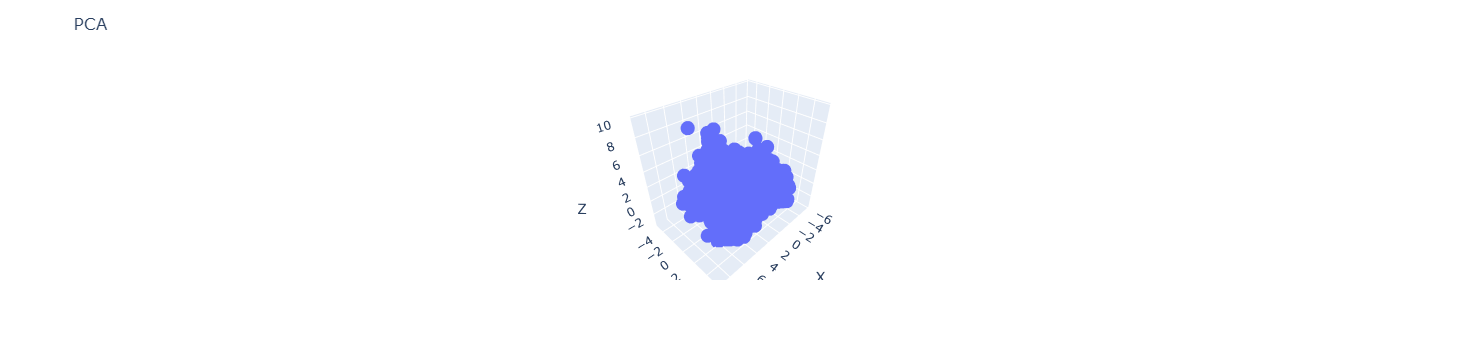

In [59]:
fig = px.scatter_3d(df_pca,x='X',y='Y',z='Z')
fig.update_layout(title='PCA')
fig.show()

# Clustering

To predetermine the value of K I will use KElbowVisualizer.

In [60]:
K = range(1,11)
wcss = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    Clusters = kmeans.fit_predict(pca_matrix)
    wcss.append(kmeans.inertia_)

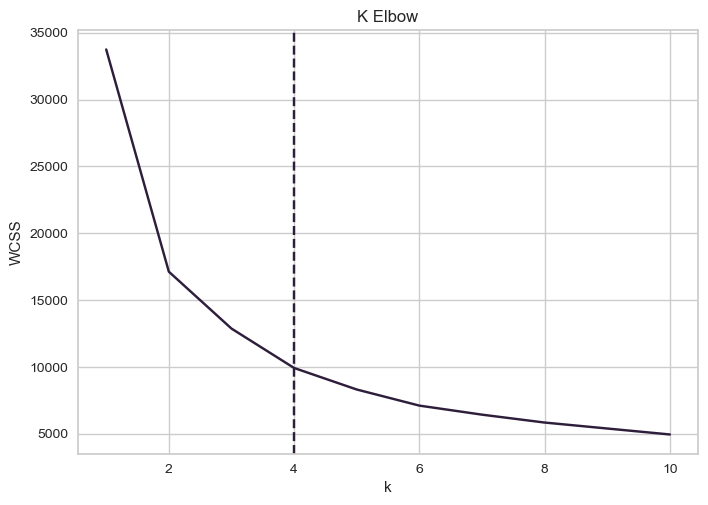

In [61]:
sns.lineplot(x=K, y=wcss)
plt.axvline(4,linestyle='--')
plt.title("K Elbow")
plt.xlabel("k")
plt.ylabel("WCSS")
plt.show()

In [62]:
k = 4
k

4

For clustering I will use AgglomerativeClustering.

AgglomerativeClustering is a hierarchical clustering technique that follows a bottom-up approach to partition the data outputting a hierarchical structure progressively.

In [63]:
AC = AgglomerativeClustering(n_clusters=k)
Clusters = AC.fit_predict(pca_matrix)

In [64]:
Clusters.shape

(2237,)

In [65]:
df_pca['Clusters'] = Clusters

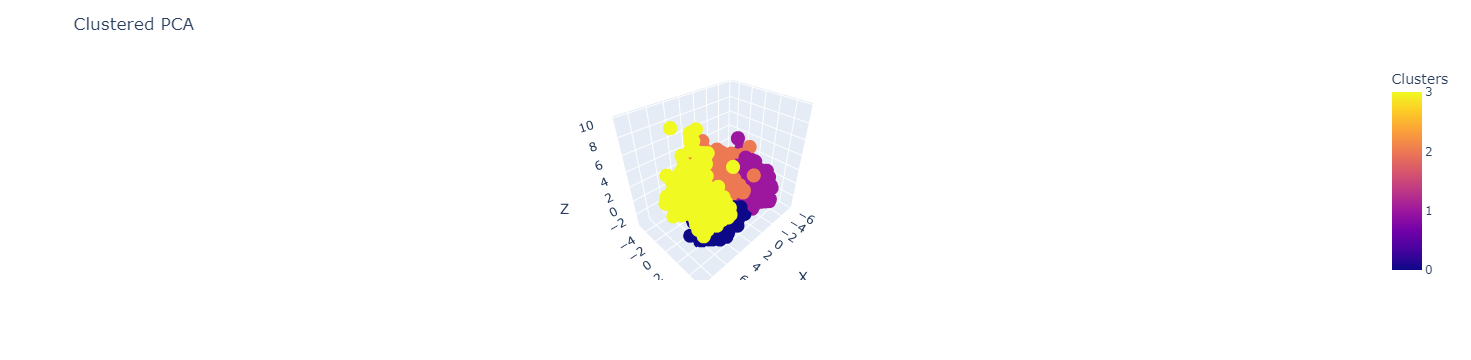

In [66]:
fig = px.scatter_3d(df_pca,x='X',y='Y',z='Z', color='Clusters')
fig.update_layout(title='Clustered PCA')
fig.show()

## Profiling

In [67]:
df_['Clusters'] = Clusters
df['Clusters'] = Clusters

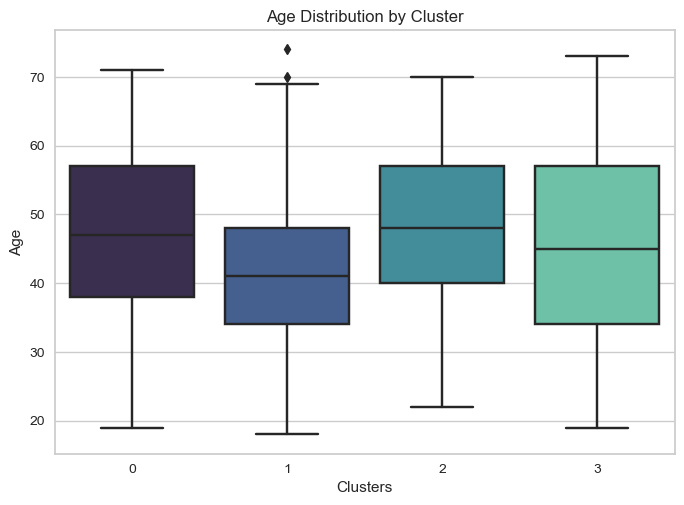

In [68]:
sns.boxplot(x='Clusters', y='Age', data=df_, palette='mako')
plt.title('Age Distribution by Cluster')
plt.show()

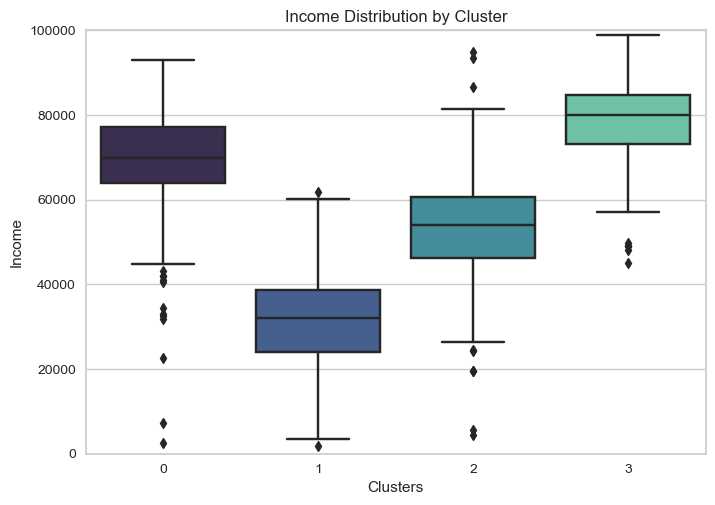

In [69]:
sns.boxplot(x='Clusters', y='Income', data=df_, palette='mako')
plt.title('Income Distribution by Cluster')
plt.ylim(0, 100000)
plt.show()

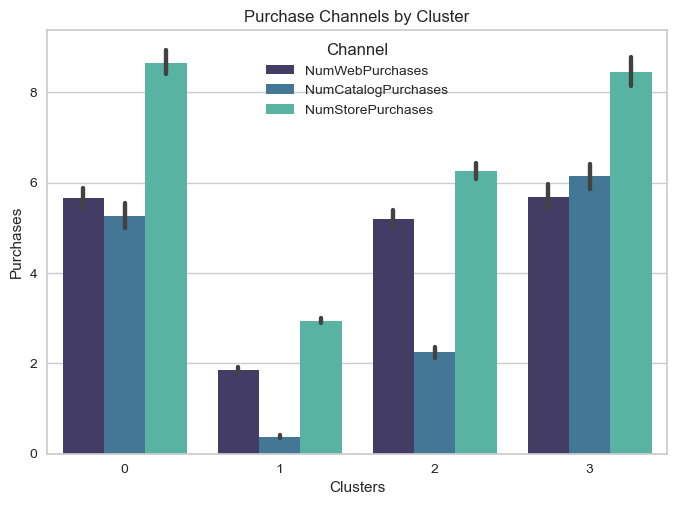

In [70]:
channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df_melted = df_.melt(id_vars=['Clusters'], value_vars=channels, var_name='Channel', value_name='Purchases')
sns.barplot(x='Clusters', y='Purchases', hue='Channel', data=df_melted, palette='mako')
plt.title('Purchase Channels by Cluster')
plt.show()

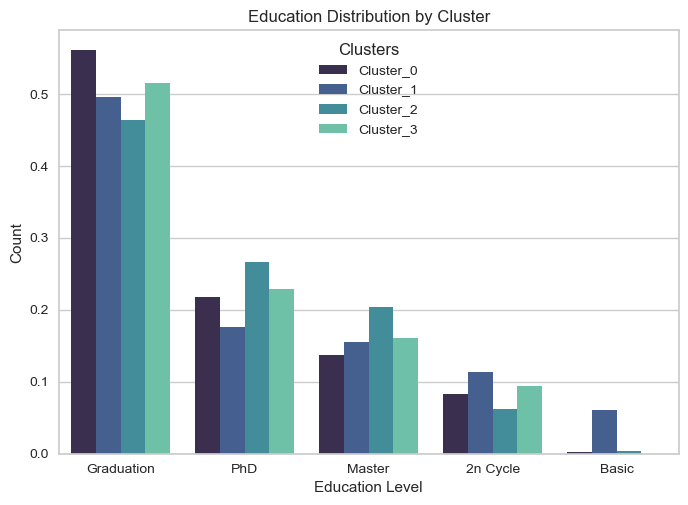

In [71]:
education = df_[['Education', 'Clusters']].groupby('Clusters').value_counts().reset_index()
education['Clusters'] = education['Clusters'].map({0:'Cluster_0',1:'Cluster_1',2:'Cluster_2',3:'Cluster_3',4:'Cluster_4'})

cluster_counts = education.groupby('Clusters')['count'].transform('sum')

education['normalized_count'] = education['count'] / cluster_counts

sns.barplot(education, x='Education',y='normalized_count',hue='Clusters', palette='mako')
plt.title('Education Distribution by Cluster')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

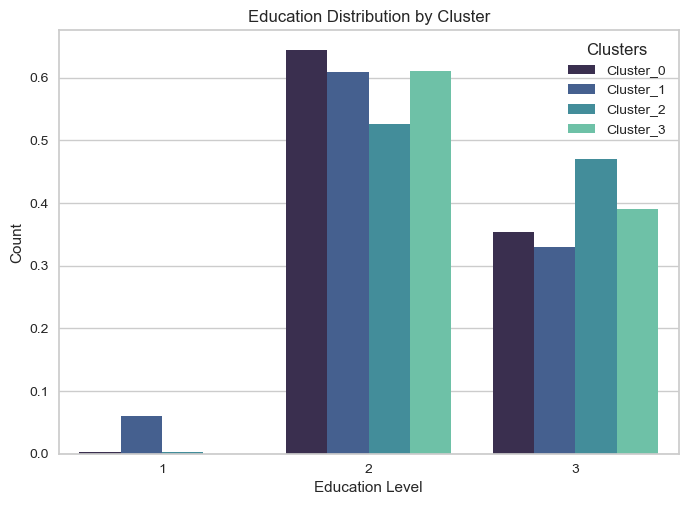

In [72]:
education = df[['Education', 'Clusters']].groupby('Clusters').value_counts().reset_index()
education['Clusters'] = education['Clusters'].map({0:'Cluster_0',1:'Cluster_1',2:'Cluster_2',3:'Cluster_3',4:'Cluster_4'})

cluster_counts = education.groupby('Clusters')['count'].transform('sum')

education['normalized_count'] = education['count'] / cluster_counts

education
sns.barplot(education, x='Education',y='normalized_count',hue='Clusters', palette='mako')
plt.title('Education Distribution by Cluster')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

In [73]:
df.sample()

ID  Education      Income  Kidhome  Teenhome  Recency  MntWines  \
1215  1506          2 42160.00000        1         1       26        48   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
1215          9               45                3                15   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
1215            20                  4                2                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
1215                  4                  6             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
1215             0             0             0         0              3   

      Z_Revenue  Response  Income_Cat  Age  Total_Spent  TotalNumPurchases  \
1215         11         1           2   39           95                  7   

      TotalAcceptedCmp  Customer_Lifetime  Famsize  have_family  HavePartner  \
1215                 0                437        2            1      0.00000   

      Single  Widow/Divorced  Clusters  
1215 1.00000         0.00000         1

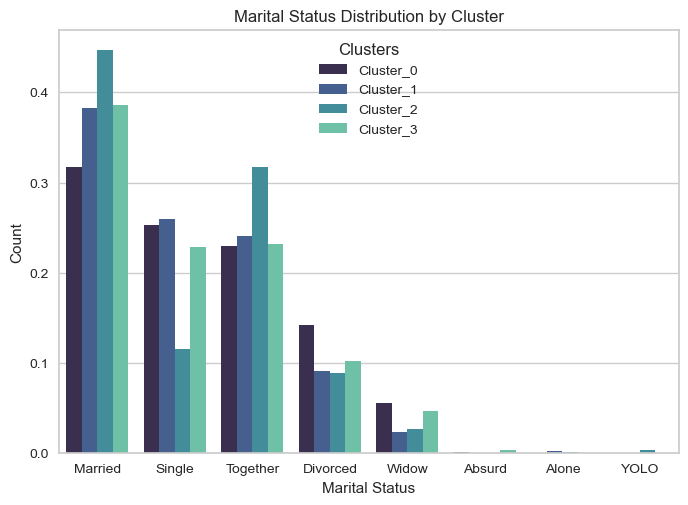

In [74]:
marital_status = df_[['Marital_Status', 'Clusters']].groupby('Clusters').value_counts().reset_index()
marital_status['Clusters'] = marital_status['Clusters'].map({0:'Cluster_0',1:'Cluster_1',2:'Cluster_2',3:'Cluster_3',4:'Cluster_4'})

cluster_counts = marital_status.groupby('Clusters')['count'].transform('sum')

marital_status['normalized_count'] = marital_status['count'] / cluster_counts

sns.barplot(marital_status, x='Marital_Status',y='normalized_count',hue='Clusters', palette='mako')
plt.title('Marital Status Distribution by Cluster')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

In [75]:
sns.set_palette("rocket")

In [76]:
df_[['Recency','Clusters']].groupby("Clusters").mean()

Recency
Clusters         
0        49.75446
1        48.66352
2        49.09826
3        49.29921

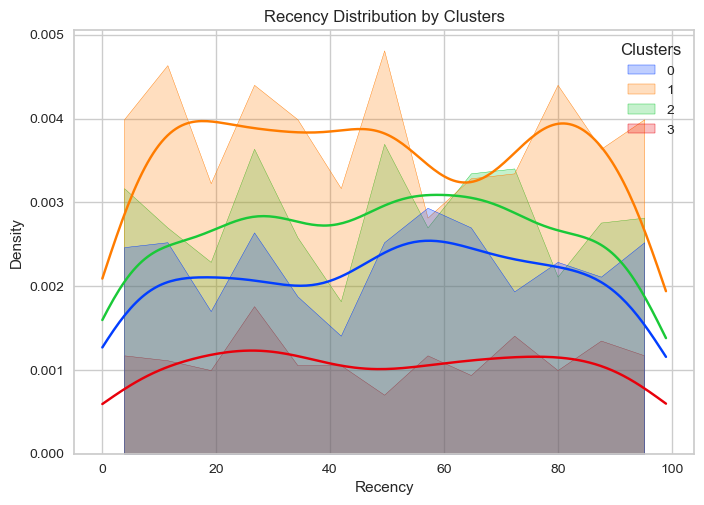

In [77]:
sns.histplot(df_, x='Recency',hue='Clusters',element="poly", palette='bright', kde=True, stat='density')
plt.title("Recency Distribution by Clusters")
plt.show()

In [78]:
df_[['Recency','Clusters']].groupby("Clusters").mean()

Recency
Clusters         
0        49.75446
1        48.66352
2        49.09826
3        49.29921

In [79]:
clusters_size = df_['Clusters'].value_counts()

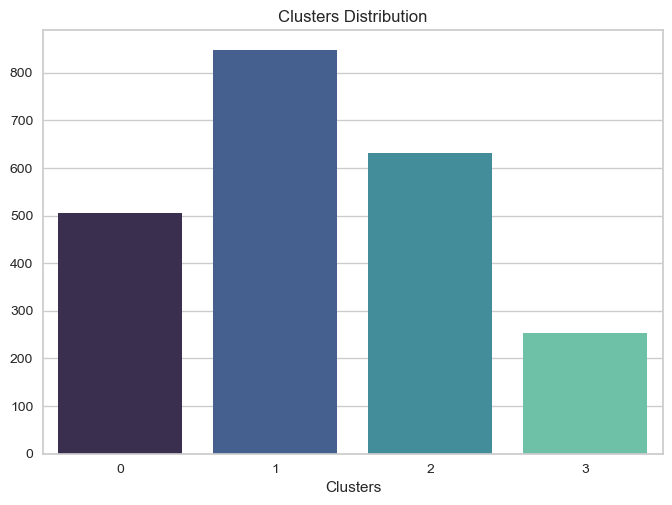

In [80]:
clusters_size = df_['Clusters'].value_counts()

sns.barplot(x=clusters_size.index, y=clusters_size.values, palette='mako')
plt.title('Clusters Distribution')
plt.show()

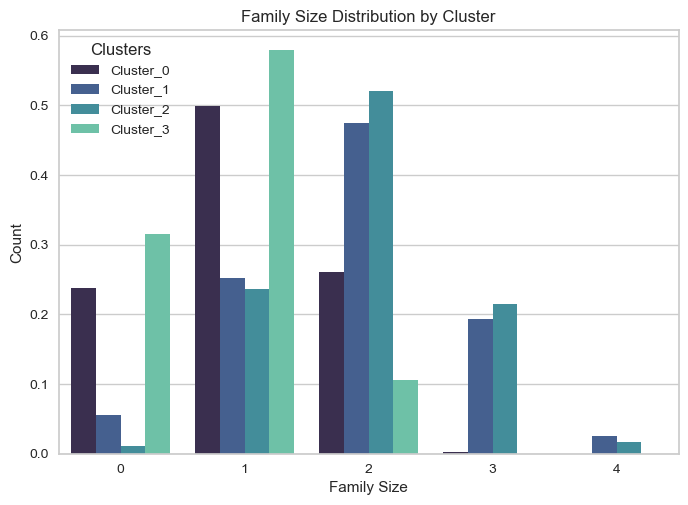

In [81]:
Famsize = df_[['Famsize', 'Clusters']].groupby('Clusters').value_counts().reset_index()
Famsize['Clusters'] = Famsize['Clusters'].map({0:'Cluster_0',1:'Cluster_1',2:'Cluster_2',3:'Cluster_3',4:'Cluster_4'})

cluster_counts = Famsize.groupby('Clusters')['count'].transform('sum')

Famsize['normalized_count'] = Famsize['count'] / cluster_counts

sns.barplot(Famsize, x='Famsize',y='normalized_count',hue='Clusters', palette='mako')
plt.title('Family Size Distribution by Cluster')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

In [82]:
have_family = df_[['have_family','Clusters']].groupby('Clusters').value_counts().reset_index()
have_family

Clusters  have_family  count
0         0            1    385
1         0            0    120
2         1            1    800
3         1            0     47
4         2            1    624
5         2            0      7
6         3            1    174
7         3            0     80

In [83]:
cluster_counts = have_family.groupby('Clusters')['count'].transform('sum')
have_family['normalized_count'] = have_family['count'] / cluster_counts
have_family

Clusters  have_family  count  normalized_count
0         0            1    385           0.76238
1         0            0    120           0.23762
2         1            1    800           0.94451
3         1            0     47           0.05549
4         2            1    624           0.98891
5         2            0      7           0.01109
6         3            1    174           0.68504
7         3            0     80           0.31496

In [84]:
have_family['Clusters'] = have_family['Clusters'].map({0:'Cluster_0',1:'Cluster_1',2:'Cluster_2',3:'Cluster_3',4:'Cluster_4'})
have_family

Clusters  have_family  count  normalized_count
0  Cluster_0            1    385           0.76238
1  Cluster_0            0    120           0.23762
2  Cluster_1            1    800           0.94451
3  Cluster_1            0     47           0.05549
4  Cluster_2            1    624           0.98891
5  Cluster_2            0      7           0.01109
6  Cluster_3            1    174           0.68504
7  Cluster_3            0     80           0.31496

<Axes: xlabel='have_family', ylabel='normalized_count'>

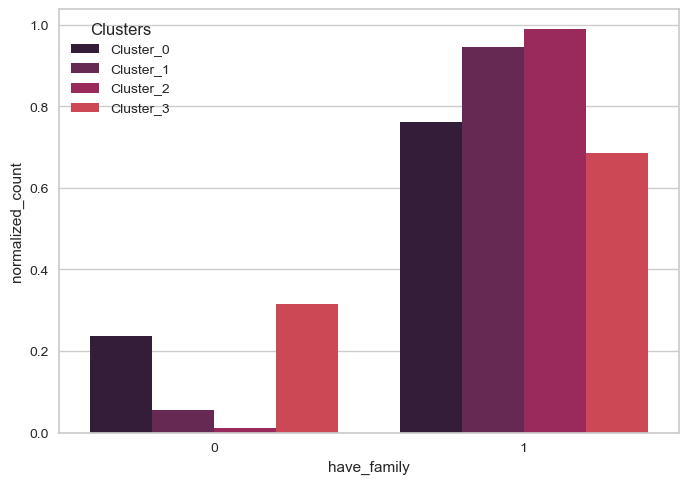

In [85]:
sns.barplot(have_family, x='have_family', y='normalized_count', hue='Clusters')

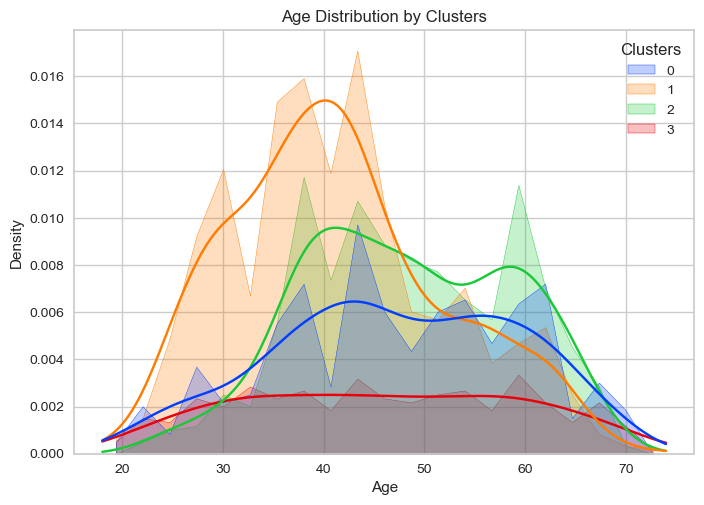

In [86]:
sns.histplot(df_, x='Age',hue='Clusters',element="poly", palette='bright', kde=True, stat='density')
plt.title("Age Distribution by Clusters")
plt.show()

In [87]:
df_[['Age','Clusters']].groupby("Clusters").mean()

Age
Clusters         
0        47.12673
1        41.38725
2        48.22821
3        45.66535

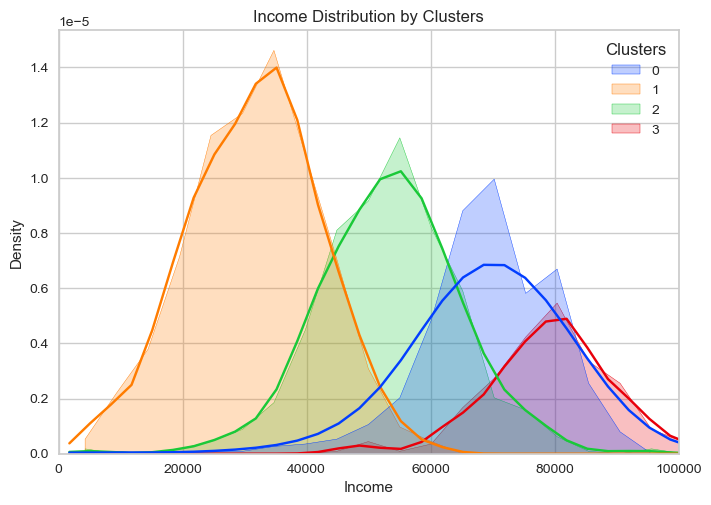

In [88]:
sns.histplot(df_, x='Income',hue='Clusters',element="poly", palette='bright', kde=True, stat='density')
plt.xlim((0,100000))
plt.title("Income Distribution by Clusters")
plt.show()

In [89]:
df_[['Income','Clusters']].groupby("Clusters").mean()

Income
Clusters            
0        71052.08137
1        31678.84072
2        53916.89160
3        79065.50223

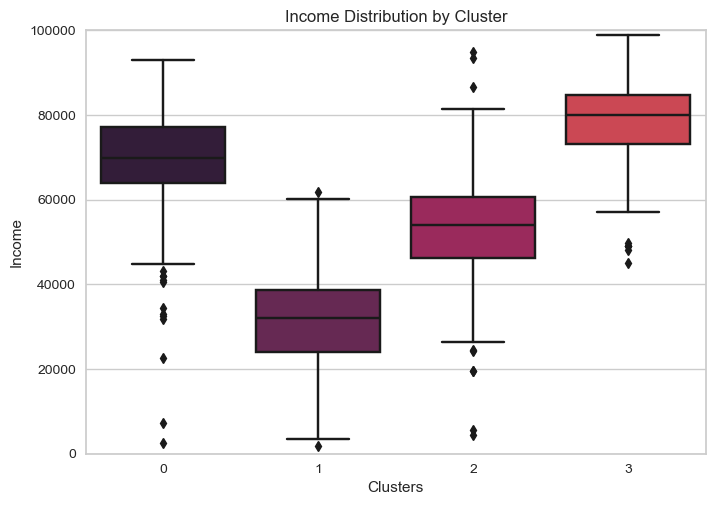

In [90]:
sns.boxplot(x='Clusters', y='Income', data=df_)
plt.title('Income Distribution by Cluster')
plt.ylim(0, 100000)
plt.show()

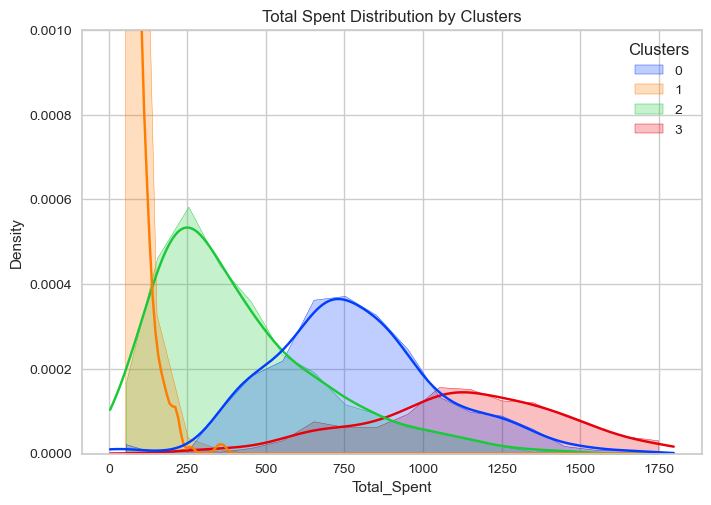

In [91]:
sns.histplot(df_, x='Total_Spent',hue='Clusters',element="poly", palette='bright', kde=True, stat='density')
# plt.xlim((0,100000))
plt.ylim((0,0.001))
plt.title("Total Spent Distribution by Clusters")
plt.show()

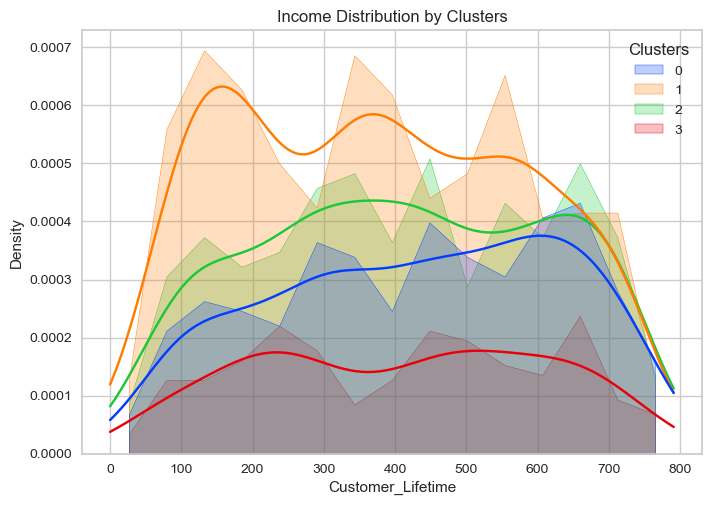

In [92]:
sns.histplot(df_, x='Customer_Lifetime',hue='Clusters',element="poly", palette='bright', kde=True, stat='density')
# plt.xlim((0,100000))
# plt.ylim((0,0.001))
plt.title("Income Distribution by Clusters")
plt.show()

In [93]:
df_[['Customer_Lifetime','Clusters']].groupby("Clusters").mean()

Customer_Lifetime
Clusters                   
0                 430.30297
1                 376.07674
2                 411.12837
3                 406.72835

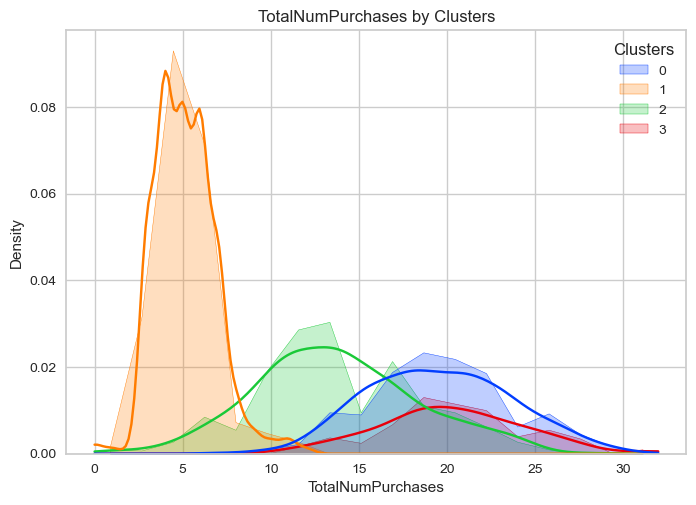

In [94]:
sns.histplot(df_, x='TotalNumPurchases',hue='Clusters',element="poly", palette='bright', kde=True, stat='density')
# plt.xlim((0,100000))
# plt.ylim((0,0.001))
plt.title("TotalNumPurchases by Clusters")
plt.show()

<Axes: xlabel='TotalAcceptedCmp', ylabel='normalized_count'>

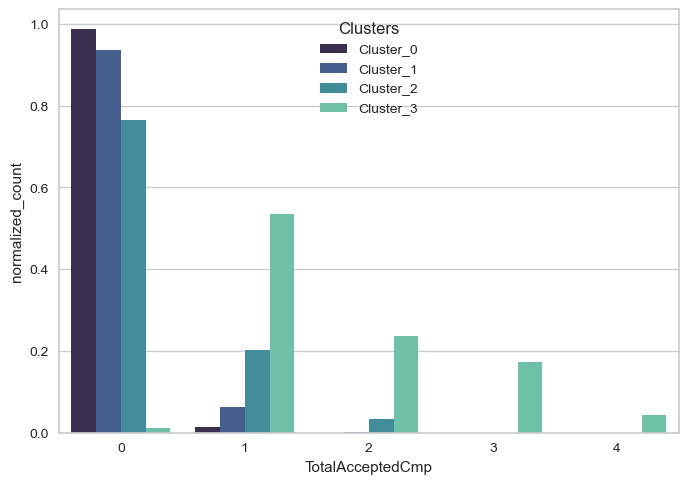

In [95]:
TotalAcceptedCmp = df_[['TotalAcceptedCmp', 'Clusters']].groupby('Clusters').value_counts().reset_index()
TotalAcceptedCmp['Clusters'] = TotalAcceptedCmp['Clusters'].map({0:'Cluster_0',1:'Cluster_1',2:'Cluster_2',3:'Cluster_3',4:'?Cluster_4'})

cluster_counts = TotalAcceptedCmp.groupby('Clusters')['count'].transform('sum')

TotalAcceptedCmp['normalized_count'] = TotalAcceptedCmp['count'] / cluster_counts

TotalAcceptedCmp
sns.barplot(TotalAcceptedCmp, x='TotalAcceptedCmp',y='normalized_count',hue='Clusters', palette='mako')
# plt.title('Family Size Distribution by Cluster')
# plt.xlabel('Family Size')
# plt.ylabel('Count')
# plt.show()

<Axes: xlabel='Kidhome', ylabel='count'>

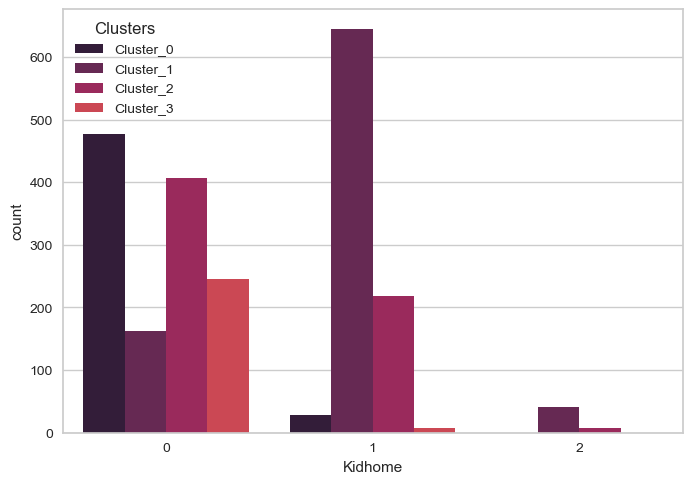

In [96]:
kidhome = df_[['Kidhome','Clusters']].groupby('Clusters').value_counts().reset_index()
kidhome['Clusters'] = kidhome['Clusters'].map({0:'Cluster_0',1:'Cluster_1',2:'Cluster_2',3:'Cluster_3',4:'?Cluster_4'})

cluster_counts = kidhome.groupby('Clusters')['count'].transform('sum')
sns.barplot(kidhome, x='Kidhome', y='count', hue='Clusters')

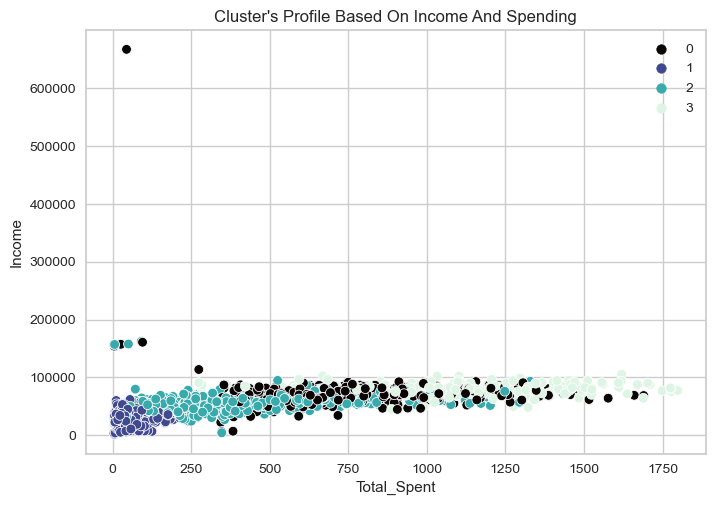

In [105]:
pl = sns.scatterplot(data = df,x=df["Total_Spent"], y=df["Income"],hue=df["Clusters"], palette='mako')
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

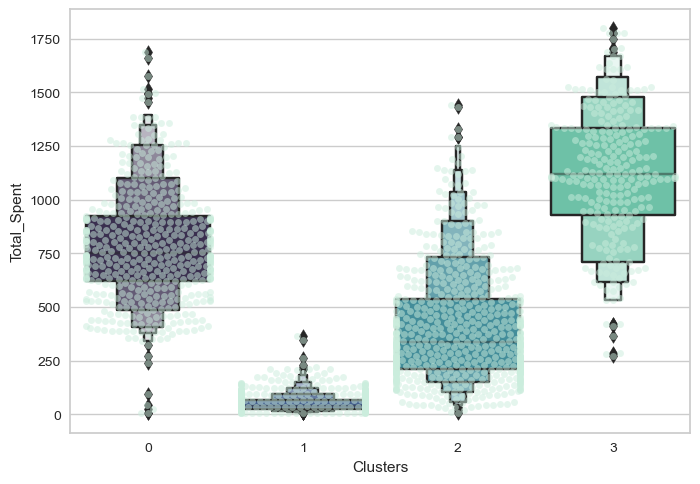

In [107]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Total_Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Total_Spent"], palette="mako")
plt.show()

In [97]:
df_.sample()

ID   Education Marital_Status      Income  Kidhome  Teenhome  \
845  5848  Graduation       Together 81205.00000        0         0   

    Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
845  2014-01-13       43       724         74              929   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
845               97                55           130                  1   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
845                5                    6                  7   

     NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
845                  2             1             0             1   

     AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
845             0             1         0              3         11         1   

    Income_Cat  Age  Total_Spent  TotalNumPurchases  TotalAcceptedCmp  \
845       high   44         1080                 18                 3   

    Recency_Date  Customer_Lifetime  Famsize  have_family  Clusters  
845   2014-08-22                221        1            1         3

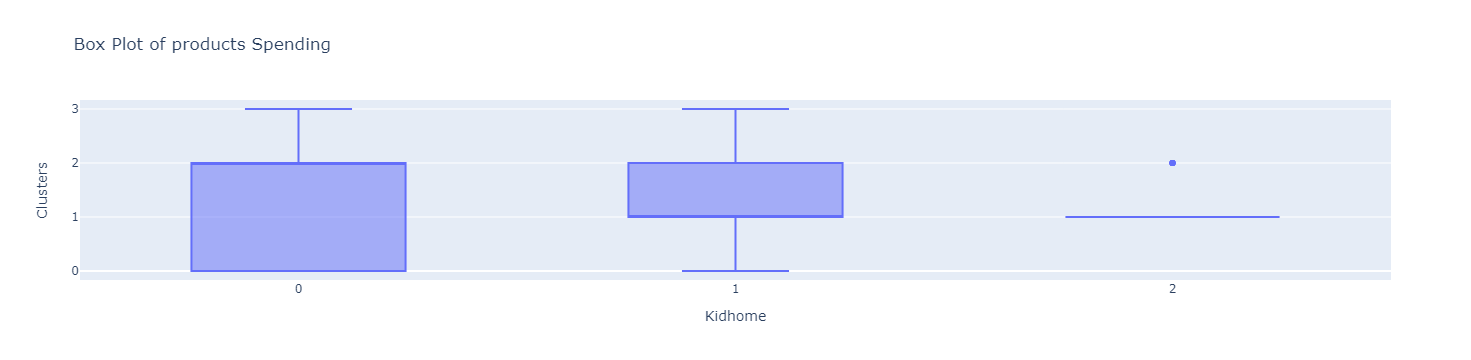

In [98]:
fig = px.box(df_, x='Kidhome',y='Clusters', title='Box Plot of products Spending')

fig.show()

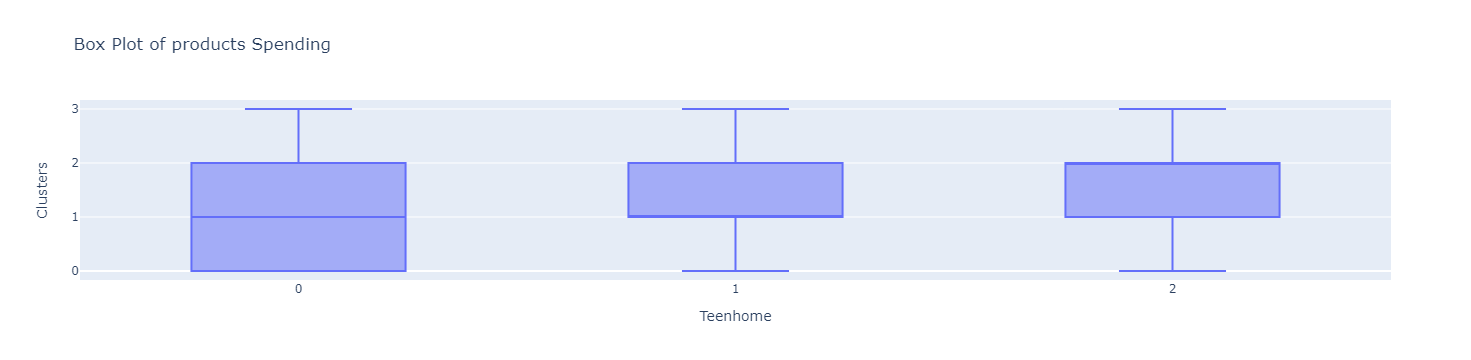

In [99]:
fig = px.box(df_, x='Teenhome',y='Clusters', title='Box Plot of products Spending')

fig.show()

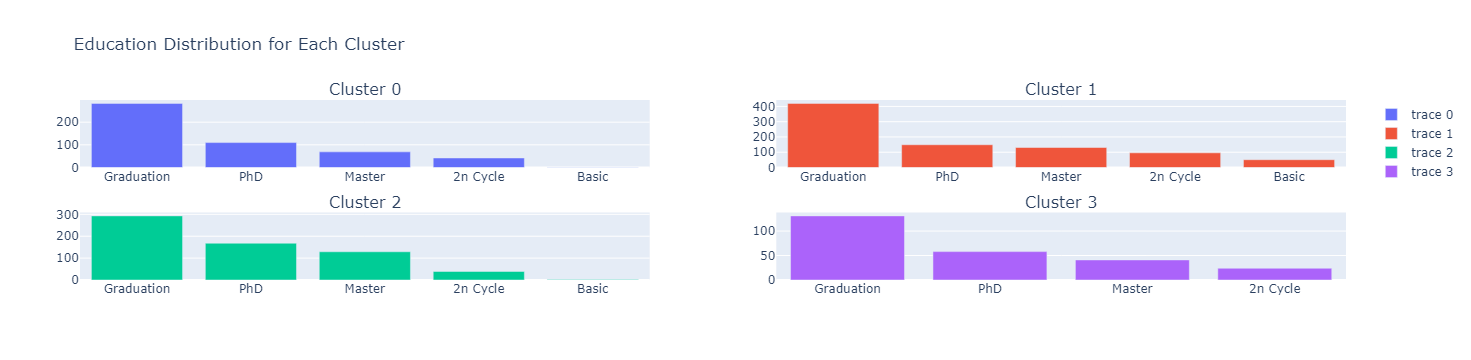

In [100]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"))
# Iterate over each cluster
for i, cluster in enumerate(df_['Clusters'].unique()):
    cluster_data = df_[df_['Clusters'] == cluster]['Education'].value_counts()
    fig.add_trace(go.Bar(x=cluster_data.index, y=cluster_data.values), row=(i // 2) + 1, col=(i % 2) + 1)
fig.update_layout(title='Education Distribution for Each Cluster')
fig.show()

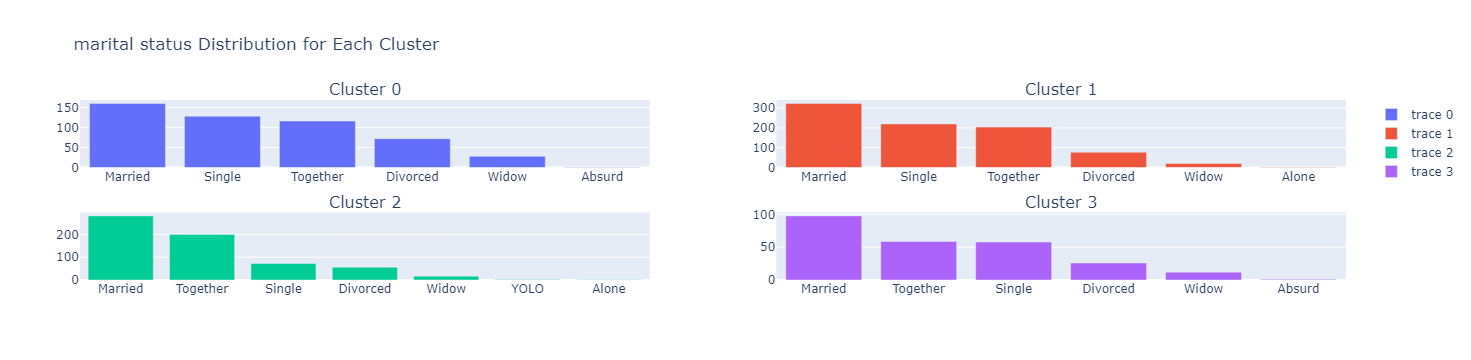

In [101]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"))
# Iterate over each cluster
for i, cluster in enumerate(df_['Clusters'].unique()):
    cluster_data = df_[df_['Clusters'] == cluster]['Marital_Status'].value_counts()
    fig.add_trace(go.Bar(x=cluster_data.index, y=cluster_data.values), row=(i // 2) + 1, col=(i % 2) + 1)
fig.update_layout(title='marital status Distribution for Each Cluster')
fig.show()

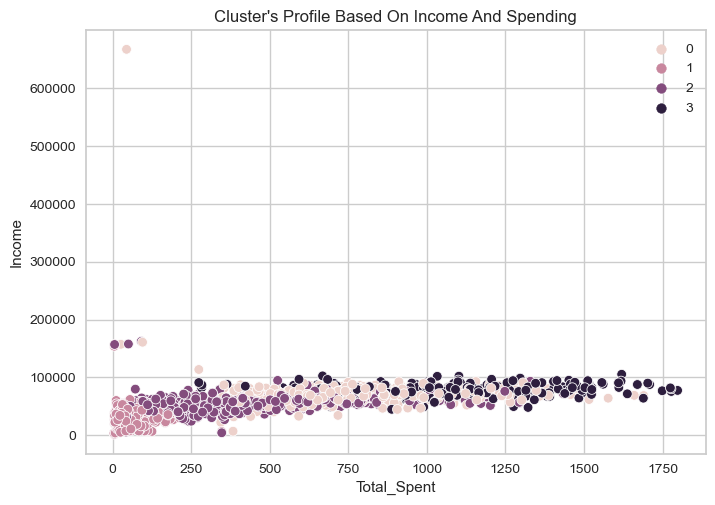

In [102]:
pl = sns.scatterplot(data = df,x=df["Total_Spent"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

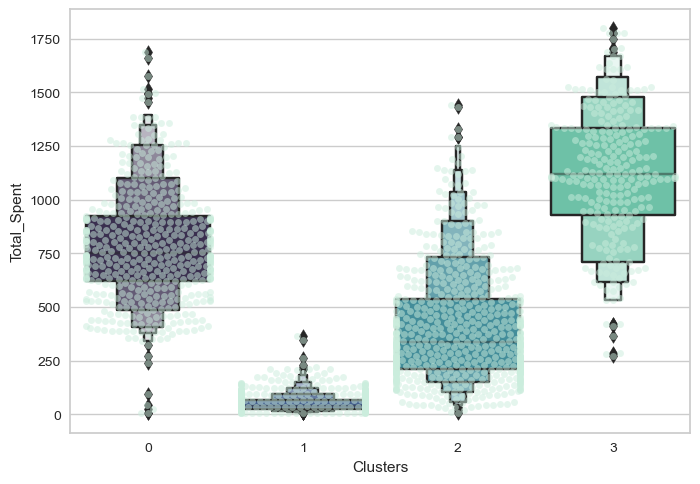

In [106]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Total_Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Total_Spent"], palette="mako")
plt.show()

In [108]:
df.sample()

ID  Education      Income  Kidhome  Teenhome  Recency  MntWines  \
1860  1459          3 69063.00000        0         1       16       666   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
1860         35              124               69                 8   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
1860            26                  1                5                    3   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
1860                  5                  3             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
1860             0             0             0         0              3   

      Z_Revenue  Response  Income_Cat  Age  Total_Spent  TotalNumPurchases  \
1860         11         0           3   48          804                 13   

      TotalAcceptedCmp  Customer_Lifetime  Famsize  have_family  HavePartner  \
1860                 0                680        2            1      1.00000   

      Single  Widow/Divorced  Clusters  
1860 0.00000         0.00000         0

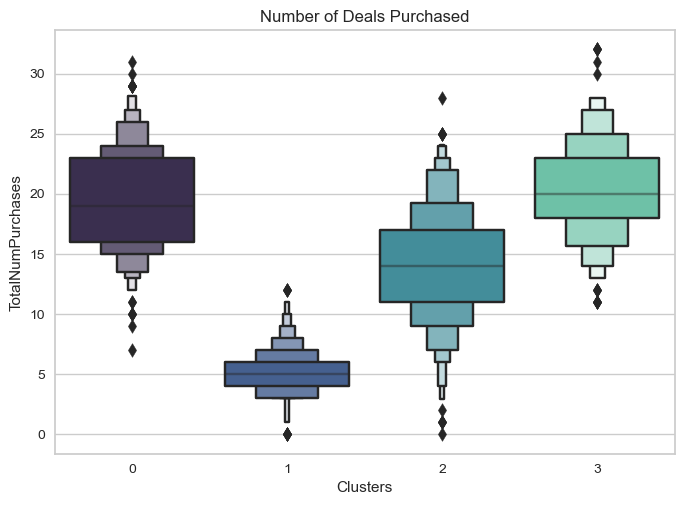

In [110]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["TotalNumPurchases"],x=df["Clusters"], palette= "mako")
pl.set_title("Number of Deals Purchased")
plt.show()

In [111]:
df.sample()

ID  Education     Income  Kidhome  Teenhome  Recency  MntWines  \
981  3955          2 4861.00000        0         0       20         2   

     MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
981          1                1                1                 0   

     MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
981             1                  0                0                    0   

     NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
981                  0                 14             0             0   

     AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
981             0             0             0         0              3   

     Z_Revenue  Response  Income_Cat  Age  Total_Spent  TotalNumPurchases  \
981         11         0           1   49            5                  0   

     TotalAcceptedCmp  Customer_Lifetime  Famsize  have_family  HavePartner  \
981                 0                 84        0            0      0.00000   

     Single  Widow/Divorced  Clusters  
981 0.00000         1.00000         1

<Figure size 800x550 with 0 Axes>

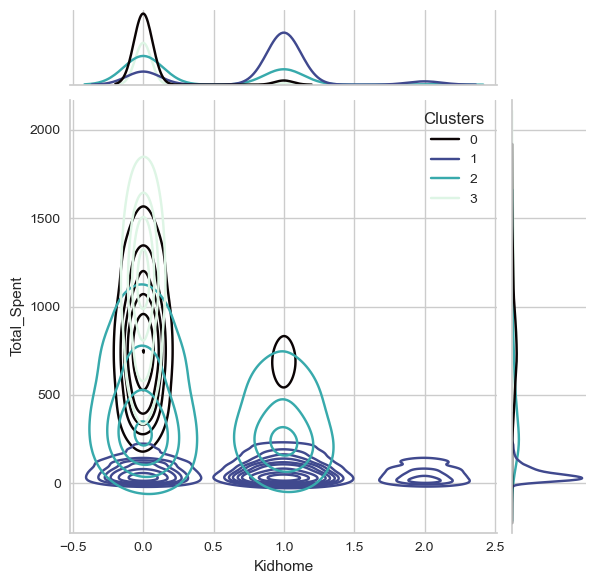

<Figure size 800x550 with 0 Axes>

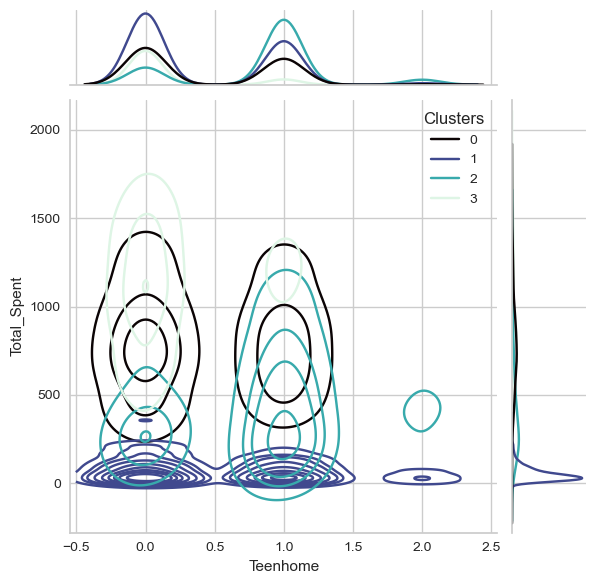

<Figure size 800x550 with 0 Axes>

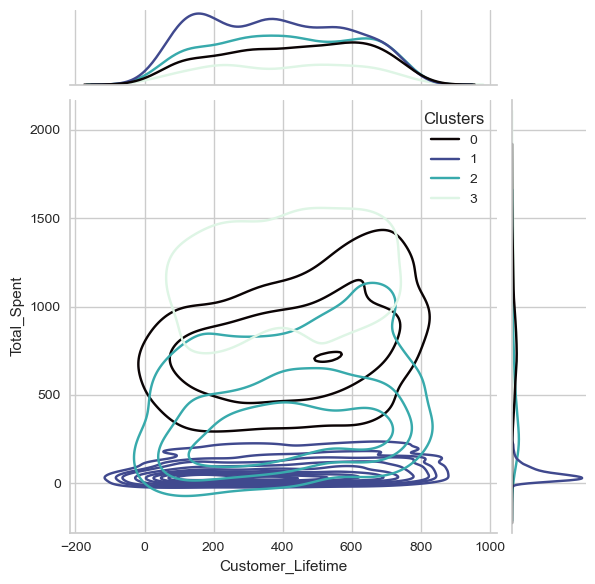

<Figure size 800x550 with 0 Axes>

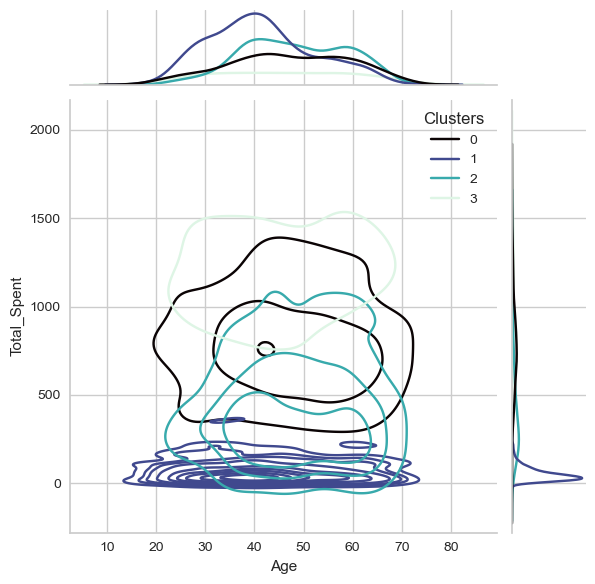

<Figure size 800x550 with 0 Axes>

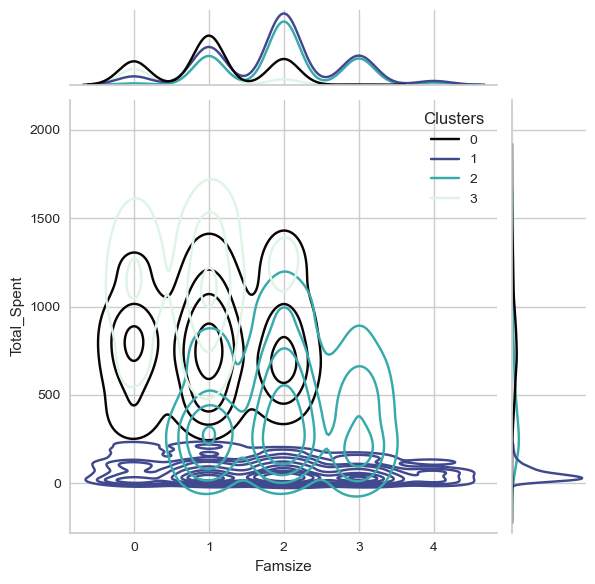

<Figure size 800x550 with 0 Axes>

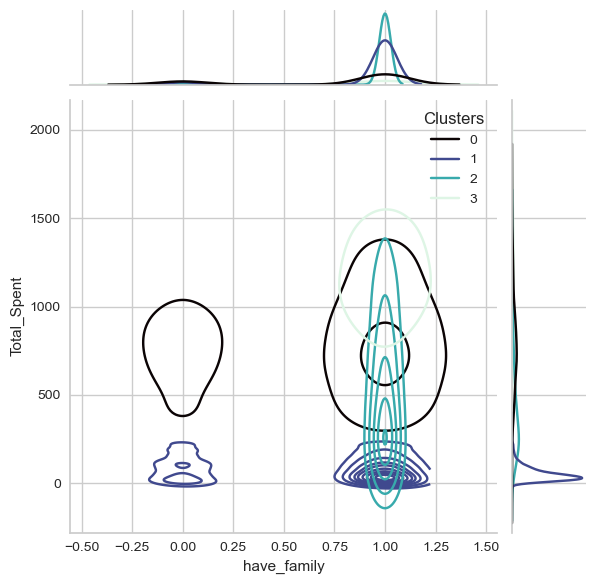

In [115]:
Personal = [ "Kidhome","Teenhome","Customer_Lifetime", "Age", "Famsize",'have_family']

for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Total_Spent"], hue =df["Clusters"], kind="kde", palette="mako")
    plt.show()

In [116]:
df_['Education'] = df_['Education'].apply(lambda x: 'HighEducation' if x in ['PhD','Master'] else x)
df_['Education'] = df_['Education'].apply(lambda x: 'MediumEducation' if x in ['Graduation','2n Cycle'] else x)
df_['Education'] = df_['Education'].apply(lambda x: 'LowEducation' if x in ['Basic'] else x)

In [117]:
df_['Marital_Status'] = df_['Marital_Status'].apply(lambda x: 'Single' if x in ['Alone','Absurd','YOLO'] else x)
df_['Marital_Status'] = df_['Marital_Status'].apply(lambda x: 'HavePartner' if x in ['Married','Together'] else x)
df_['Marital_Status'] = df_['Marital_Status'].apply(lambda x: 'Widow/Divorced' if x in ['Widow','Divorced'] else x)

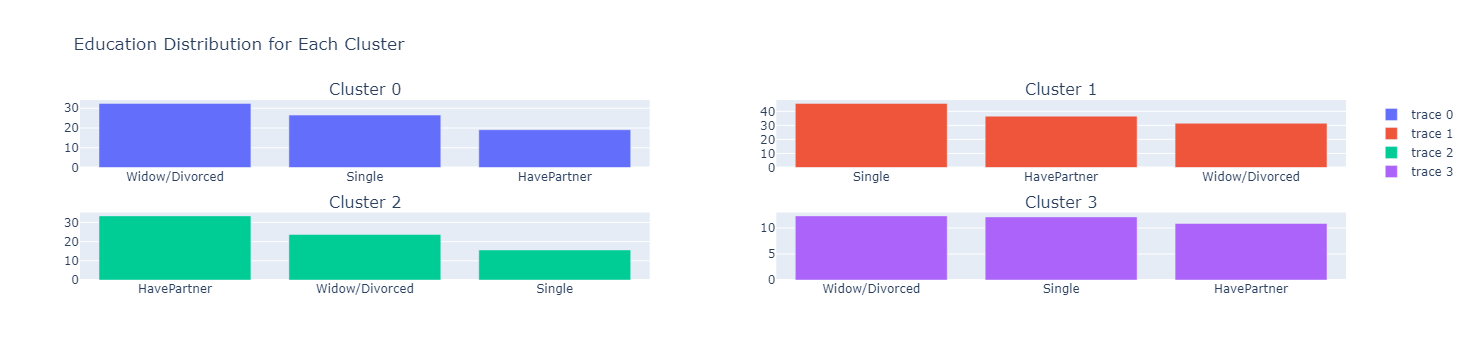

In [118]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"))
# Iterate over each cluster
for i, cluster in enumerate(df_['Clusters'].unique()):
    cluster_data = df_[df_['Clusters'] == cluster]['Marital_Status'].value_counts() / df_['Marital_Status'].value_counts() * 100
    cluster_data = cluster_data.sort_values(ascending=False)
    fig.add_trace(go.Bar(x=cluster_data.index, y=cluster_data.values), row=(i // 2) + 1, col=(i % 2) + 1)
fig.update_layout(title='Education Distribution for Each Cluster')
fig.show()

In [119]:
df_[df_['Clusters'] == cluster]['Education'].value_counts() / df_['Education'].value_counts()

Education
HighEducation     0.11579
LowEducation          NaN
MediumEducation   0.11672
Name: count, dtype: float64

In [120]:
df_['Education'].value_counts()

Education
MediumEducation    1328
HighEducation       855
LowEducation         54
Name: count, dtype: int64

In [121]:
df_desc = df_.describe().T

# Define a custom color map
color_map = sns.light_palette("seagreen", as_cmap=True)

# Apply the custom color map to the descriptive statistics DataFrame
styled_df_desc = df_desc.style.background_gradient(cmap=color_map)

# Display the styled DataFrame
styled_df_desc